### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.io as pio
pio.renderers.default = "png"

### Helper Functions
Below is a list of helper functions that aid my analysis

In [2]:
def print_acceptance_ratio(criteria, acceptance_ratio):
    message = "Acceptance Ratio for " + criteria +": {}"
    print(message.format(round(acceptance_ratio,2)))
    
def calculate_acceptance_ratio(for_dataframe):
    return for_dataframe.query('Y_str == "Accepted"').shape[0]/for_dataframe.shape[0]

def cross_tab_acceptance_ratio(for_dataframe, column):
    cross_df = pd.crosstab(for_dataframe['Y_str'],for_dataframe[column]).T
    cross_df['Acceptance_Ratio'] = cross_df['Accepted'] / (cross_df['Accepted'] + cross_df['Rejected'])
    return cross_df

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [3]:
data = pd.read_csv('data/coupons.csv')

In [4]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

###### Which columns have nulls and what percentage of their data is missing?


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

##### Are there duplicate rows? Remove them

In [6]:
data_original_size = data.shape
duplicates = data.loc[data.duplicated(keep='first')]
data = data.drop_duplicates()
print("Removed {0} rows from {1}".format(duplicates.shape[0], data_original_size[0]))

Removed 74 rows from 12684


##### Use regex to clean whitespaces in the income column

In [7]:
import re

combine_whitespace_regex = re.compile(r"(?a:\s+)")
data['income'] = data['income'].apply(lambda x:combine_whitespace_regex.sub(" ",x))

##### Fix typo in the passenger column

In [8]:
data = data.rename(columns={"passanger":"passenger"})

##### Replace Coupon acceptance values with more readable format

In [9]:
data['Y_str'] = data['Y'].apply(lambda x: 'Accepted' if x == 1 else 'Rejected')

##### Display unique values

In [10]:
pd.set_option('display.max_colwidth', 0)
uniqueness_dict = pd.Series({c: data[c].nunique() for c in data}).to_dict()
pd.Series({c: data[c].unique() for c in data})

destination             [No Urgent Place, Home, Work]                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            
passenger               [Alone, Friend(s), Kid(s), Partner]                                                                                                                                                                                                                                                                                           

In [11]:
pd.reset_option('display.max_colwidth')

3. Decide what to do about your missing data -- drop, replace, other...

##### Missing values

In [12]:
# what percent of total rows have missing values in the columns with missing values
rows_with_nulls = data.query('Bar.isnull() | CarryAway.isnull() | CoffeeHouse.isnull() | RestaurantLessThan20.isnull() | Restaurant20To50.isnull()', engine='python').shape[0]
row_with_nulls_ratio = rows_with_nulls/data.shape[0]
print(row_with_nulls_ratio)

0.04781919111816019


Since the combines missing values only make up 4% of the data, I do not want to delete rows with missing values in just a few columns

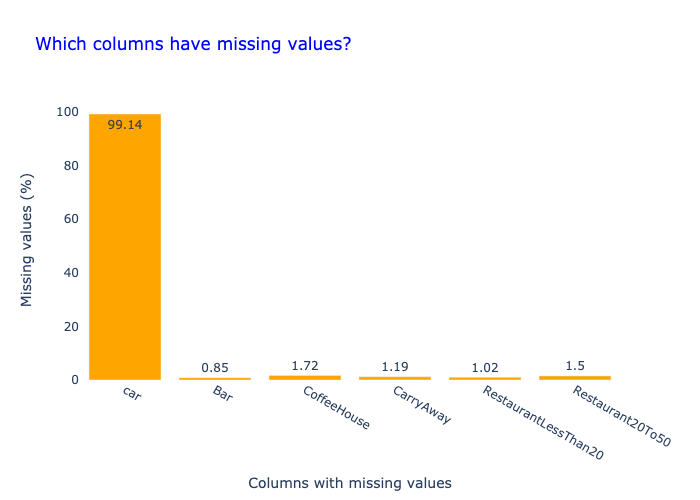

In [13]:
total_rows = data.shape[0]
columns_with_nulls = pd.Series({c:data[c].isnull().sum()/total_rows for c in data if (data[c].isnull().sum()/total_rows > 0)})
fig = px.bar(np.round(columns_with_nulls * 100, decimals=2),
                labels={
                 "value": "Missing values (%)",
                 "index": "Columns with missing values",
                 },
                title="Which columns have missing values?",
                text_auto=True, 
                color_discrete_sequence=["orange"])
fig.update_layout(showlegend = False,
                  plot_bgcolor='white',
                  title_font_color="blue")
#fig.write_image("images/missing_values.jpeg",scale=1, width=1000, height=800)
fig.show()

###### Drop the Car column as it has too many nulls and will not be a valuable feature

In [14]:
data = data.drop(columns='car')

###### Replace missing values with the mode value for that column

##### Distribution before missing value substitution

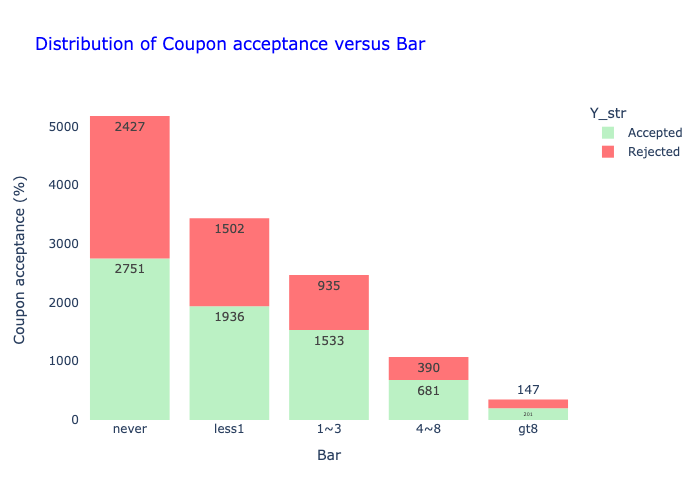

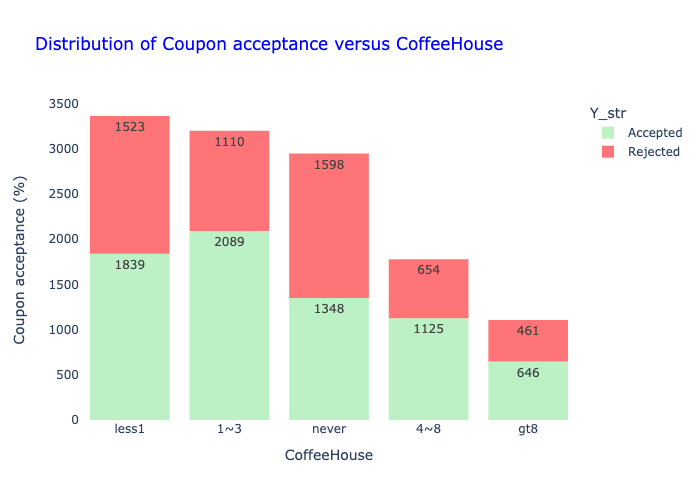

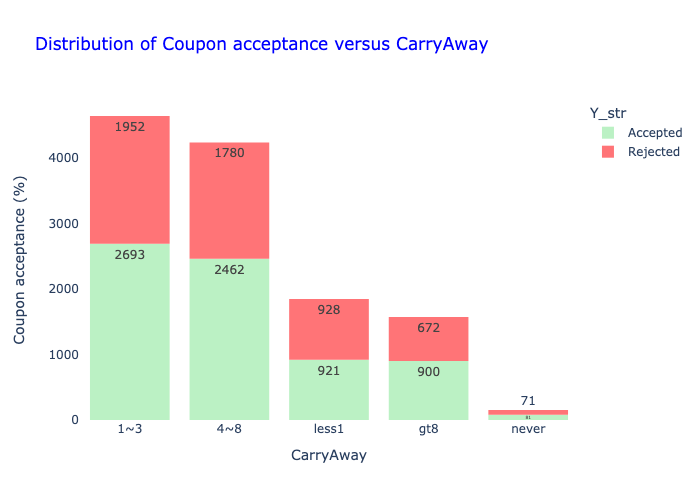

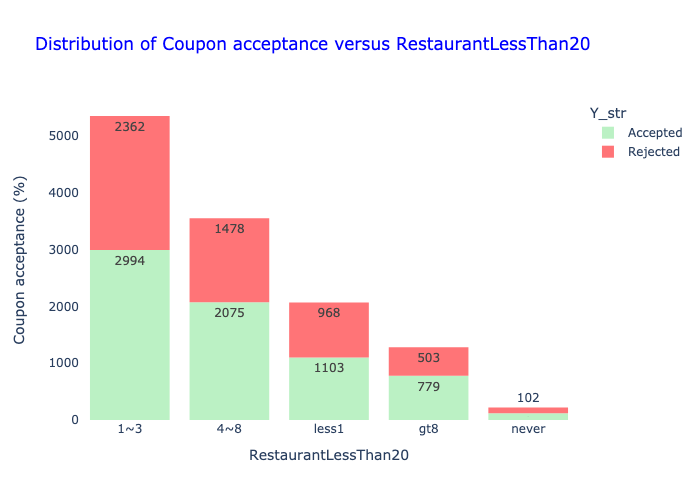

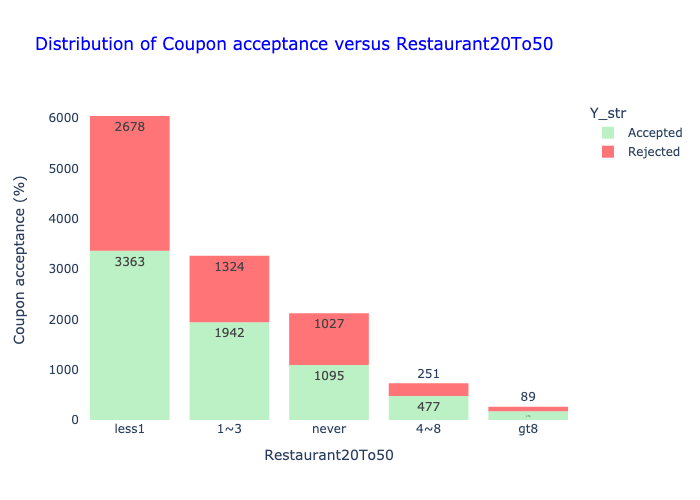

In [15]:
nulllist =[];
from IPython.display import display, HTML
display(HTML("""
<style>
    div.output_scroll {height: 50em; }
</style>
"""))
for col in data.columns:    
    if (data[col].isnull().any()):
        nulllist.append(col)
        fig = px.histogram(data,
                x=col, 
                color="Y_str", 
                title=f'Distribution of Coupon acceptance versus {col}',
                text_auto=True,
                color_discrete_map={'Rejected':'#FF7477','Accepted':'#BBF1C4'})
        fig.update_layout(showlegend = True,
                plot_bgcolor='white',
                title_font_color="blue",
                yaxis_title = "Coupon acceptance (%)",
                xaxis_title = col)
        fig.update_xaxes(categoryorder = "total descending")
        fig.show()

The %acceptance ratio for the most frequent categories remains the same after mode substitution, so we have not skewed the distribution on accident.

In [16]:
for col in nulllist:      
    print("Substituting NaN in {0} with {1}".format(col,data[col].mode()[0]))
    data[col].fillna(data[col].mode()[0], inplace=True)
   

Substituting NaN in Bar with never
Substituting NaN in CoffeeHouse with less1
Substituting NaN in CarryAway with 1~3
Substituting NaN in RestaurantLessThan20 with 1~3
Substituting NaN in Restaurant20To50 with less1


###### Distribution after mode substitution

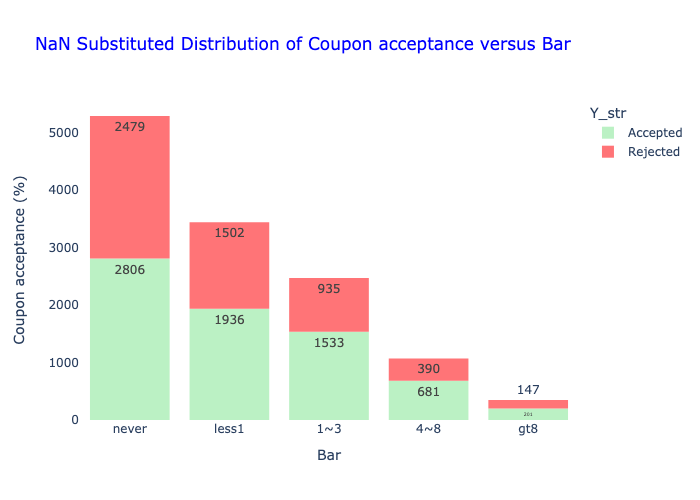

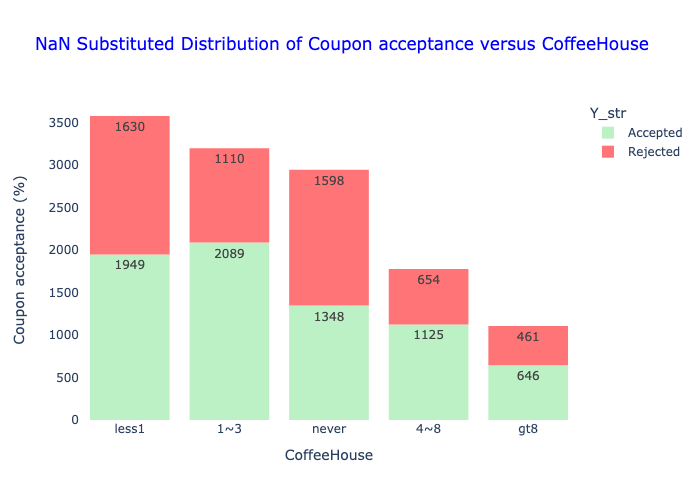

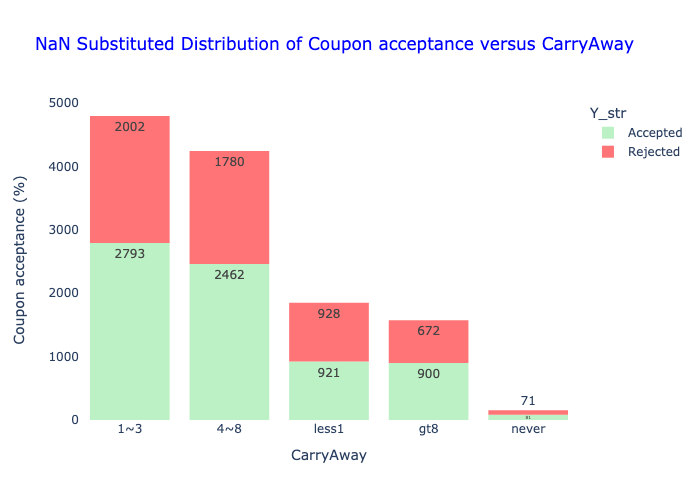

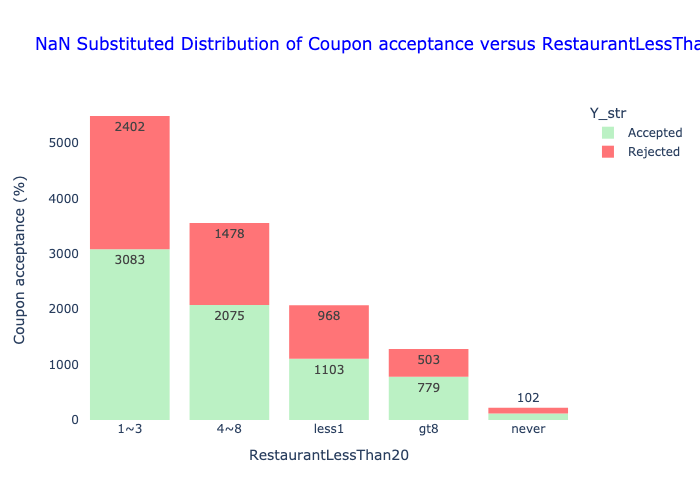

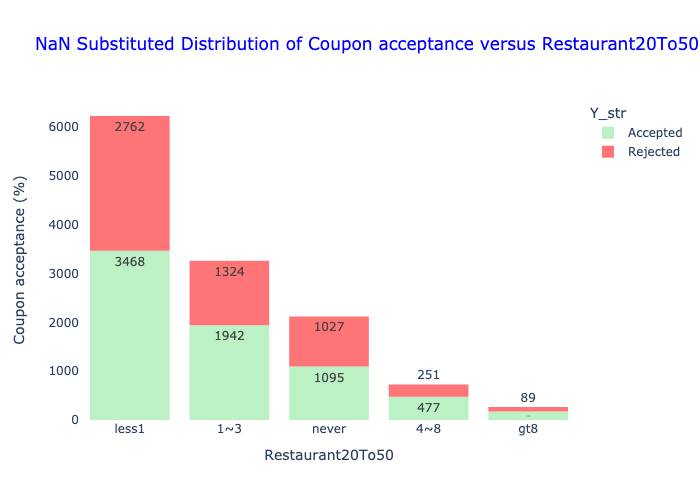

In [17]:
# Increase the height of the cell to display all the charts
from IPython.display import display, HTML
display(HTML("""
<style>
    div.output_scroll {height: 50em; }
</style>
"""))
for col in nulllist:      
    fig = px.histogram(data,
                x=col, 
                color="Y_str", 
                title=f'NaN Substituted Distribution of Coupon acceptance versus {col}',
                text_auto=True,
                color_discrete_map={'Rejected':'#FF7477','Accepted':'#BBF1C4'})
    fig.update_layout(showlegend = True,
                plot_bgcolor='white',
                title_font_color="blue",
                yaxis_title = "Coupon acceptance (%)",
                xaxis_title = col)
    fig.update_xaxes(categoryorder = "total descending")
    #fig.write_image("images/freq_"+col+".jpg")
    fig.show()

##### Examine the distribution of the other columns

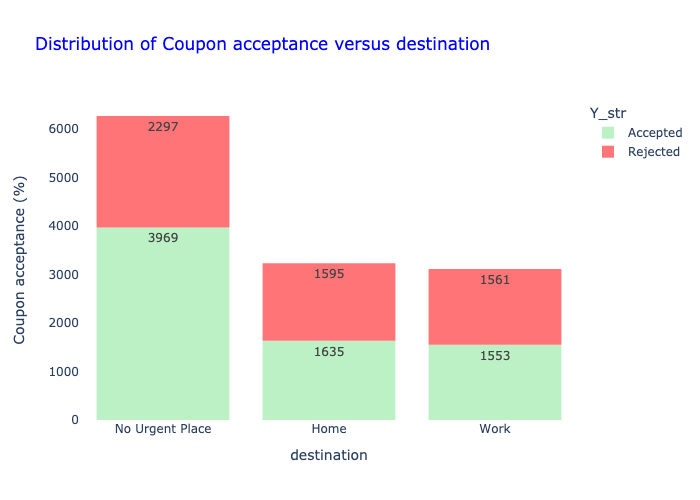

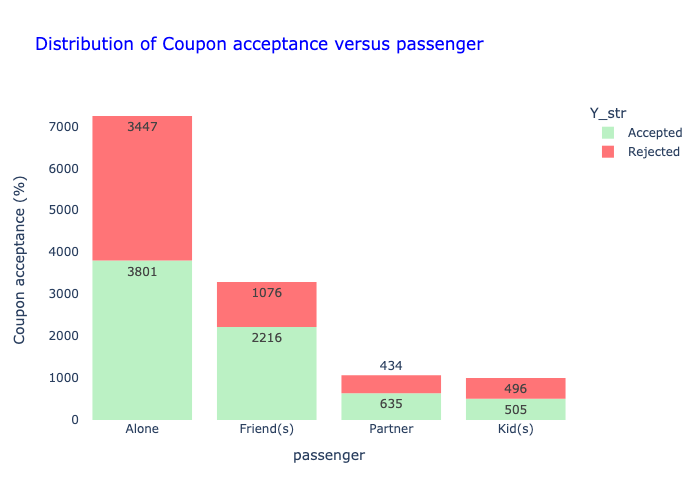

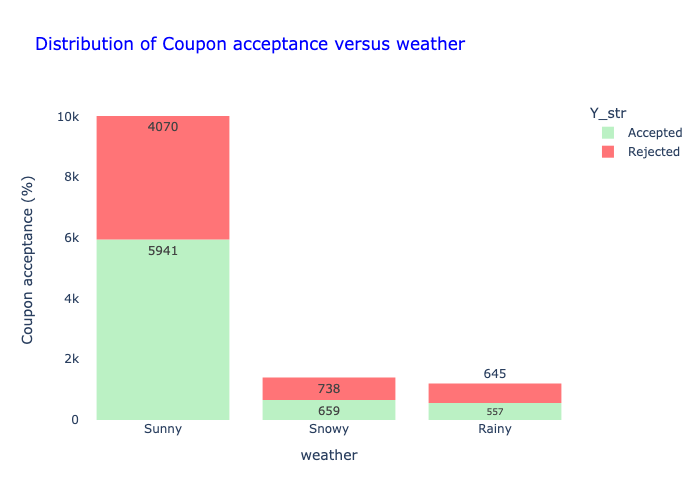

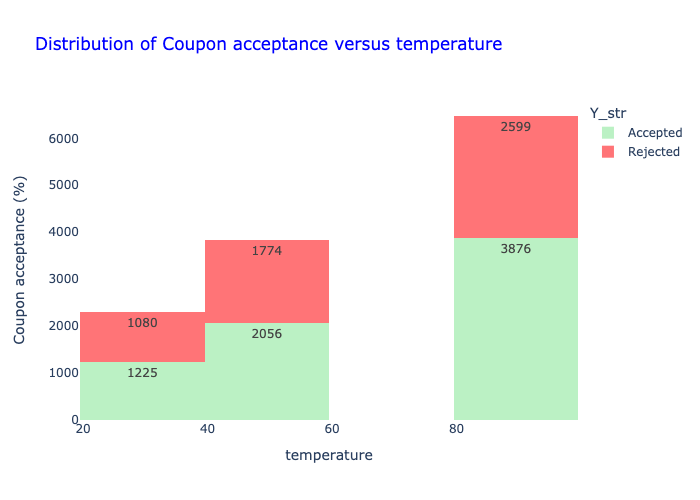

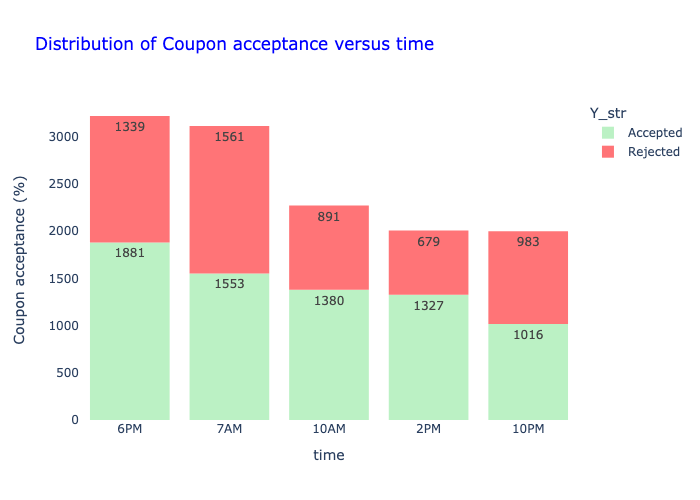

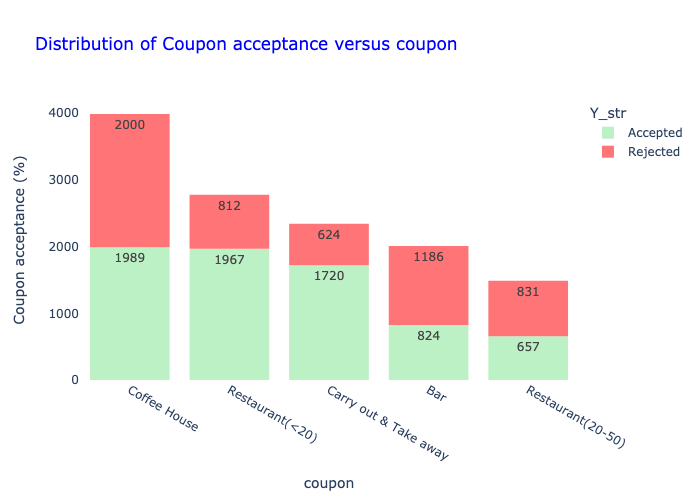

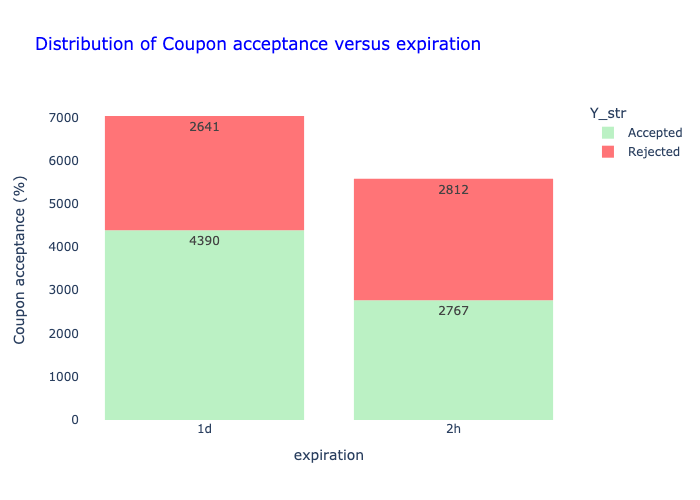

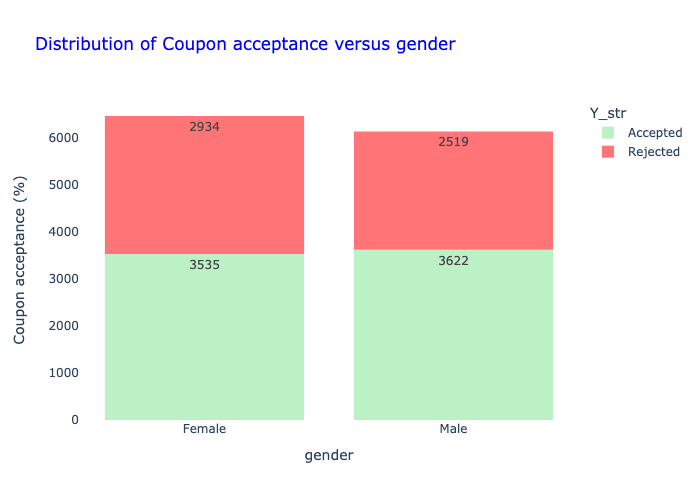

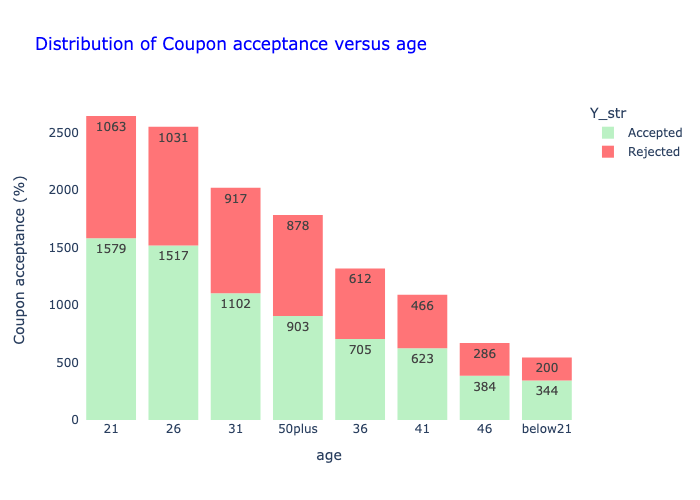

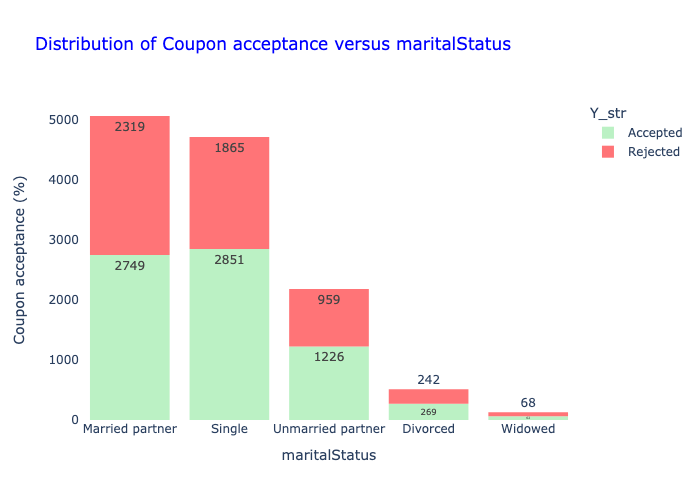

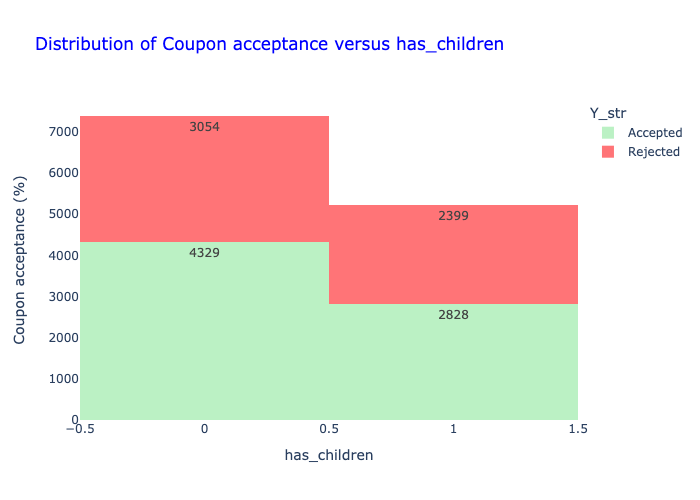

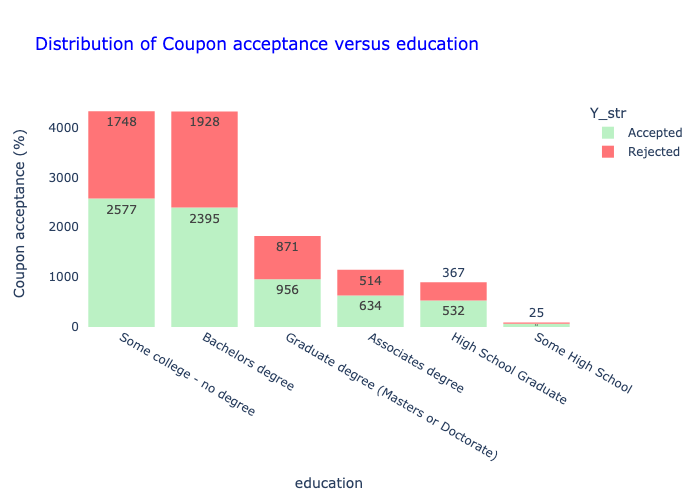

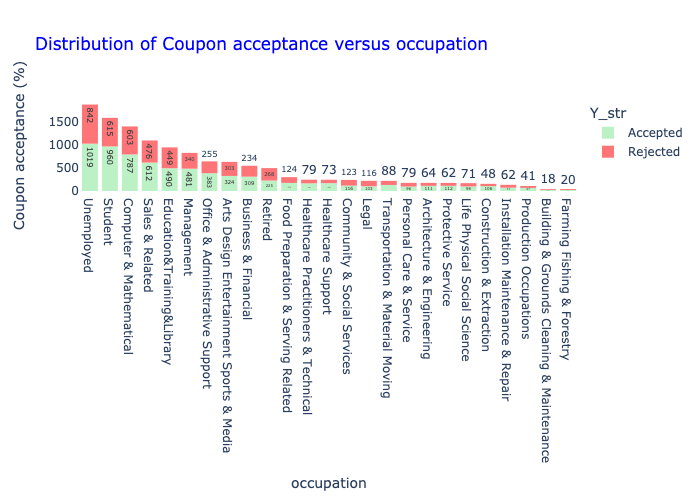

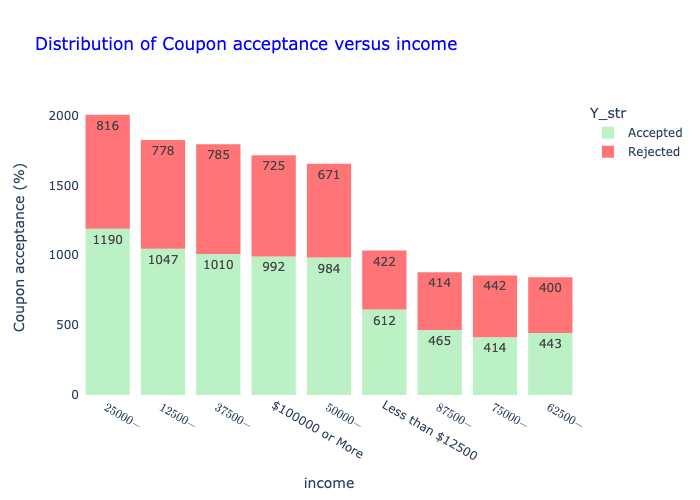

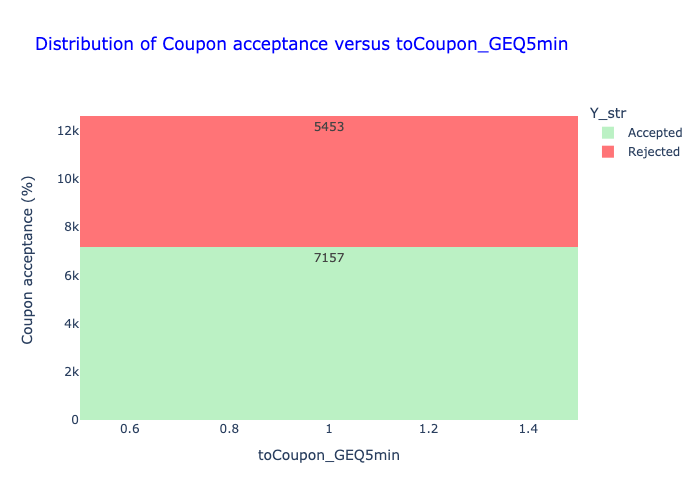

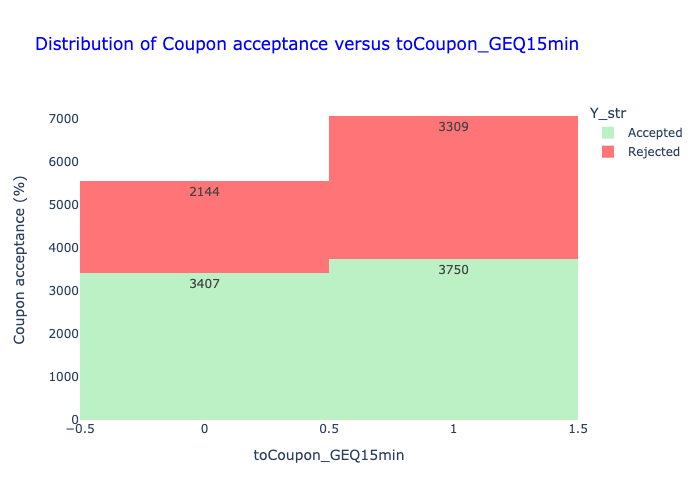

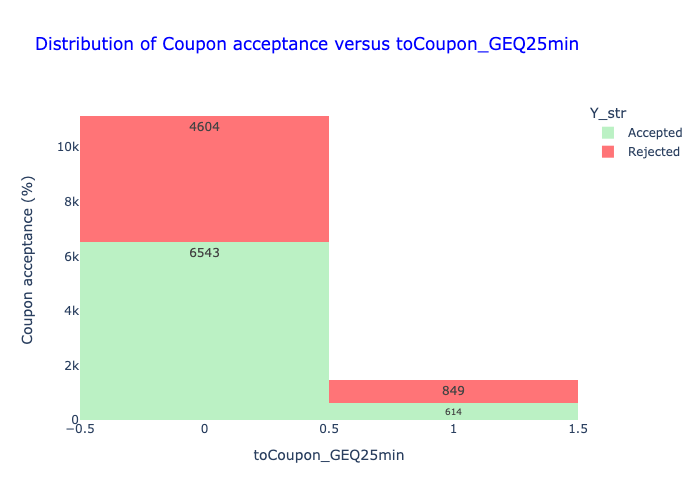

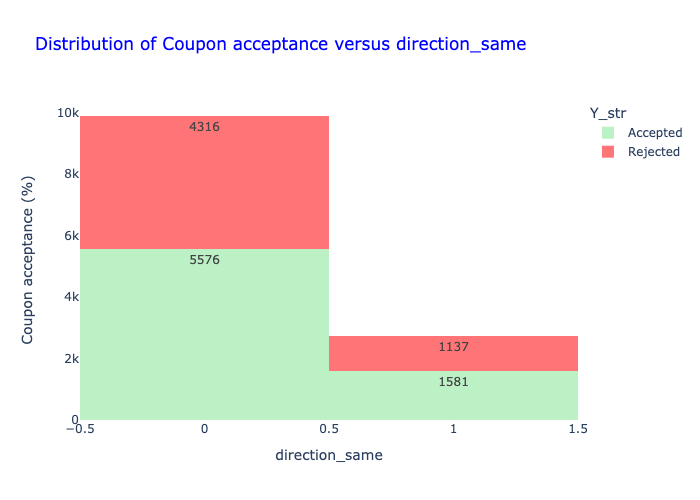

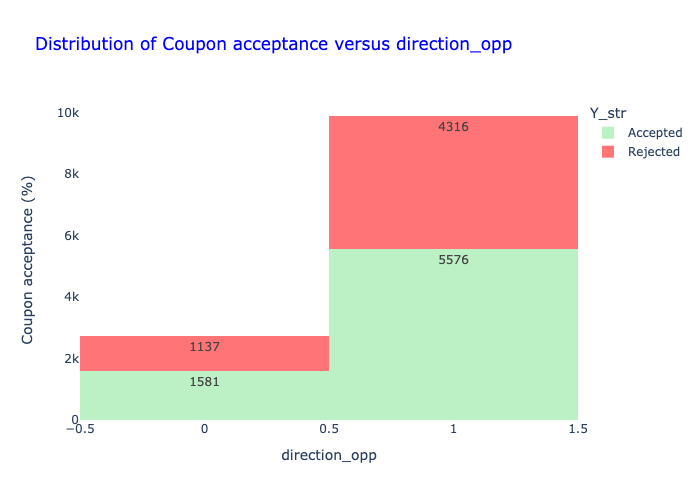

In [18]:
for col in data.columns:   
    if ((col not in ['Y','Y_str']) and (col not in nulllist)):   
        fig = px.histogram(data,
                   x=col, 
                   color="Y_str", 
                   title=f'Distribution of Coupon acceptance versus {col}',
                   text_auto=True,
                   color_discrete_map={'Rejected':'#FF7477','Accepted':'#BBF1C4'})
        fig.update_layout(showlegend = True,
                  plot_bgcolor='white',
                  title_font_color="blue",
                  yaxis_title = "Coupon acceptance (%)",
                  xaxis_title = col)
        fig.update_xaxes(categoryorder = "total descending")
        #fig.write_image("images/freq_"+col+".jpg")
        fig.show()

##### Check the correlation between numerical columns in this dataframe

/Users/lisajacob/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning:

The figure layout has changed to tight



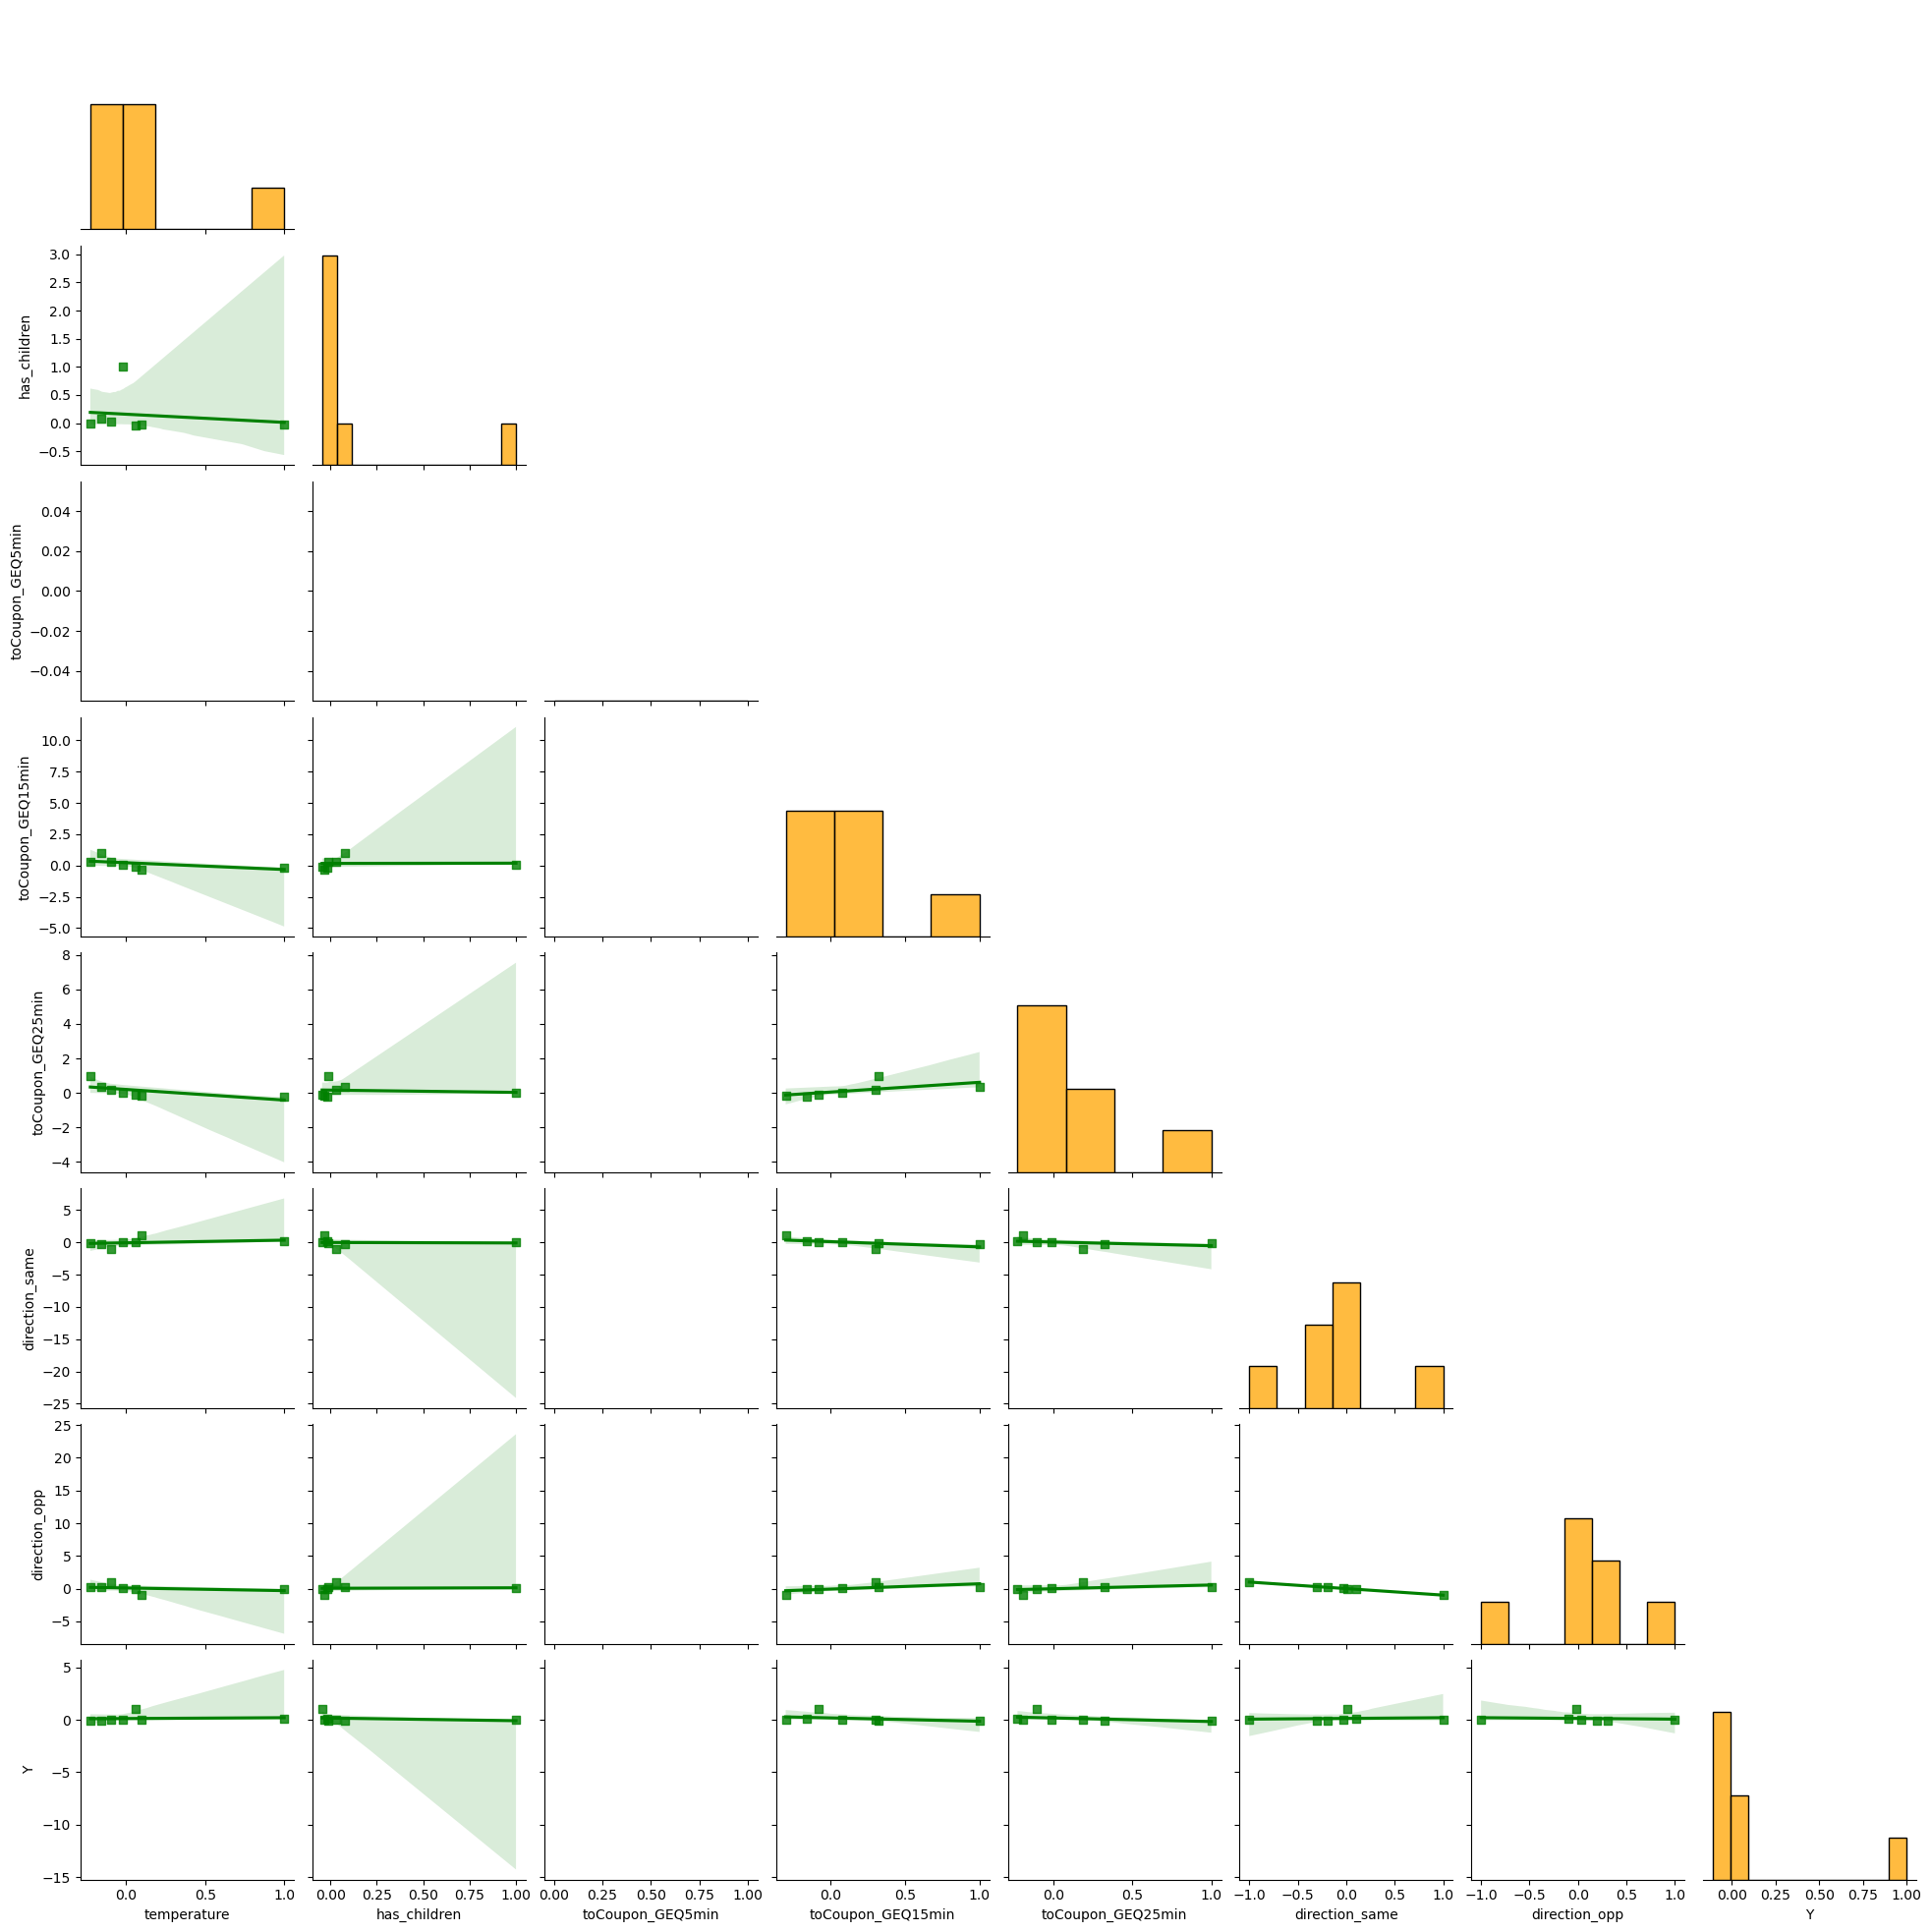

In [19]:
correlation_matrix_numerical = data.corr(numeric_only=True)
sns.pairplot(correlation_matrix_numerical, 
             corner=True,  
             plot_kws = {'color': 'green', 'marker': 's'},
             diag_kws = {'color': 'orange'}, 
             kind="reg")

- toCoupon_GEQ5min is not correlated to anything, even Y. This is because there is only one value 1. We can ignore or drop this column for the rest of the analysis.
- direction_same and direction_opp are perfectly correlated on every point. We do not need to analyze both columns and can drop one.

4. What proportion of the total observations chose to accept the coupon? 



In [20]:
total_acceptance = calculate_acceptance_ratio(data)
print_acceptance_ratio("all observations",total_acceptance)

Acceptance Ratio for all observations: 0.57


5. Use a bar plot to visualize the `coupon` column.

In [21]:
coupon_y_crosstab = pd.crosstab(data['coupon'], data['Y_str']).reset_index()

In [22]:
print(coupon_y_crosstab)

Y_str                 coupon  Accepted  Rejected
0                        Bar       824      1186
1      Carry out & Take away      1720       624
2               Coffee House      1989      2000
3          Restaurant(20-50)       657       831
4            Restaurant(<20)      1967       812


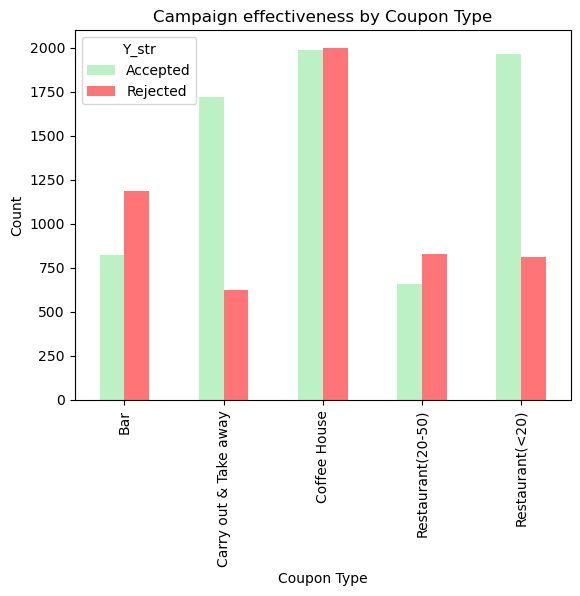

<Figure size 100000x80000 with 0 Axes>

In [51]:
fig = coupon_y_crosstab.plot(kind='bar', 
                             x='coupon', 
                             color={'Accepted':'#BBF1C4','Rejected':'#FF7477'})
fig.set(xlabel='Coupon Type', ylabel='Count', title='Campaign effectiveness by Coupon Type')
plt.figure(figsize=(1000,800))
plt.show()
#plt.savefig("images/Coupon.jpeg")


6. Use a histogram to visualize the temperature column.

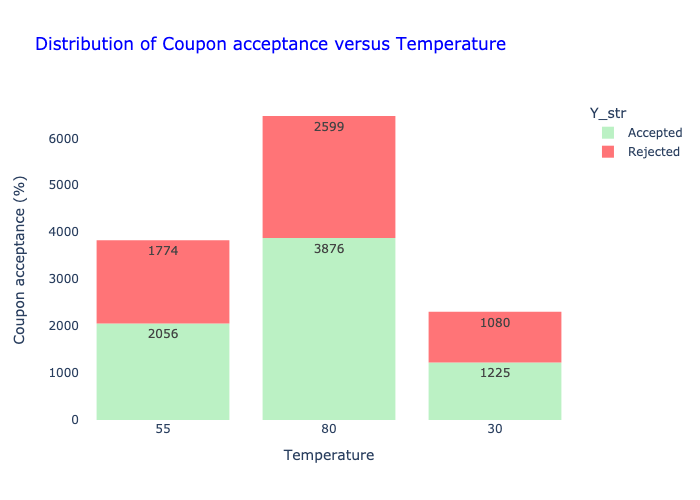

In [24]:
data['temperature_str'] = data['temperature'].astype(str)
fig = px.histogram(data,
                   x="temperature_str", 
                   color="Y_str", 
                   title='Distribution of Coupon acceptance versus Temperature',
                   text_auto=True, 
                   color_discrete_map={'Rejected':'#FF7477','Accepted':'#BBF1C4'})
fig.update_layout(showlegend = True,
                  plot_bgcolor='white',
                  title_font_color="blue",
                  yaxis_title = "Coupon acceptance (%)",
                  xaxis_title = "Temperature")
fig.show()

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


##### There are two potential ways to approach this question because of ambiguity in the context of this dataset.
1. Examine the coupon column and analyze the value "Bar"
2. Examine the Bar column

In [25]:
#Approach 1: 
coupons_bar_df = data.query('coupon == "Bar"')[['coupon','Y_str']]
print(coupons_bar_df.sample(5))

      coupon     Y_str
11614    Bar  Accepted
11865    Bar  Rejected
5551     Bar  Rejected
5413     Bar  Rejected
4173     Bar  Accepted


In [26]:
#Approach 2:
column_bar_df = data[['Bar','Y_str']]
print(column_bar_df.sample(5))

         Bar     Y_str
4563     1~3  Accepted
193    less1  Accepted
5251   less1  Rejected
8305     1~3  Rejected
11691  never  Rejected


2. What proportion of bar coupons were accepted?


###### There are two potential ways to approach this question because of ambiguity in the context of this dataset.
1. Examine the coupon column and analyze the value "Bar"
2. Examine the Bar column

In [27]:
#Approach 1:

#Calculate the acceptance ratio of coupons of type "Bar"
bar_coupon_acceptance_ratio = calculate_acceptance_ratio(coupons_bar_df)

#sanity check using Crosstab
bar_cross_df = cross_tab_acceptance_ratio(coupons_bar_df, 'coupon')


print_acceptance_ratio("Bar Coupon",bar_coupon_acceptance_ratio)
print("\n")
print(bar_cross_df)

Acceptance Ratio for Bar Coupon: 0.41


Y_str   Accepted  Rejected  Acceptance_Ratio
coupon                                      
Bar          824      1186           0.40995


In [52]:
#Approach 2: 
#Calculate the Acceptance ratio for the Bar column subset of the dataframe. 
#Naturally, this acceptance ratio would match that of the full dataframe.
bar_column_acceptance_ratio = calculate_acceptance_ratio(column_bar_df)
print_acceptance_ratio("Bar Column",bar_column_acceptance_ratio)

Acceptance Ratio for Bar Column: 0.57


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


##### Quick visual analysis to get a feel for what to expect. 

In [29]:
column_bar_cross_df = cross_tab_acceptance_ratio(column_bar_df, 'Bar')
print(column_bar_cross_df.sort_values(by="Acceptance_Ratio",ascending=False))

Y_str  Accepted  Rejected  Acceptance_Ratio
Bar                                        
4~8         681       390          0.635854
1~3        1533       935          0.621151
gt8         201       147          0.577586
less1      1936      1502          0.563118
never      2806      2479          0.530937


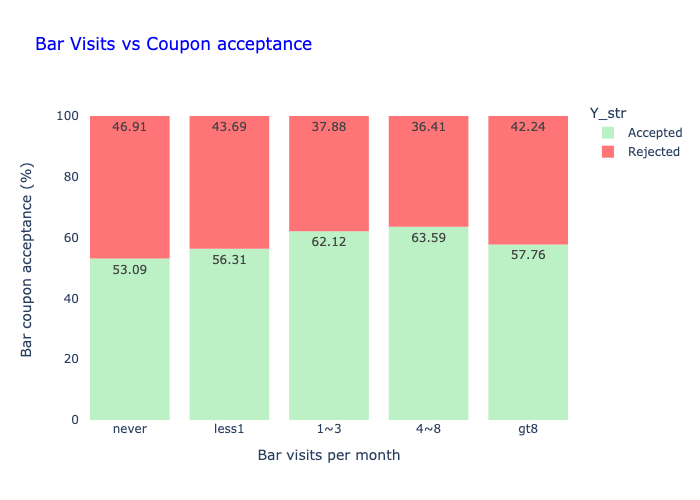

In [30]:
fig = px.histogram(data,
                x="Bar",
                color="Y_str",
                color_discrete_map={'Rejected':'#FF7477','Accepted':'#BBF1C4'},
                title="Bar Visits vs Coupon acceptance",
                text_auto=True,
                barnorm="percent",
                category_orders={"Bar": ["never", "less1", "1~3", "4~8", "gt8"]})
fig.update_layout(showlegend = True,
                  plot_bgcolor='white',
                  title_font_color="blue",
                  yaxis_title = "Bar coupon acceptance (%)",
                  xaxis_title = "Bar visits per month")
fig.update_traces(texttemplate='%{y:.2f}')
#fig.write_image("images/barvisits_couponacceptance.jpeg",scale=1, width=1000, height=800)
fig.show()

###### The data reveals two insights:
1. The acceptance ratio is highest for drivers who visit the bar between 1 to 8 times per month. 
2. Acceptance is higher than rejections for folks who never go to the bar. This makes me want to dig deeper to see which type of coupons are being accepted by the drivers who never go to the bar. They may not be accepting coupons for a bar, they might be doing so for restaurants or something else. 

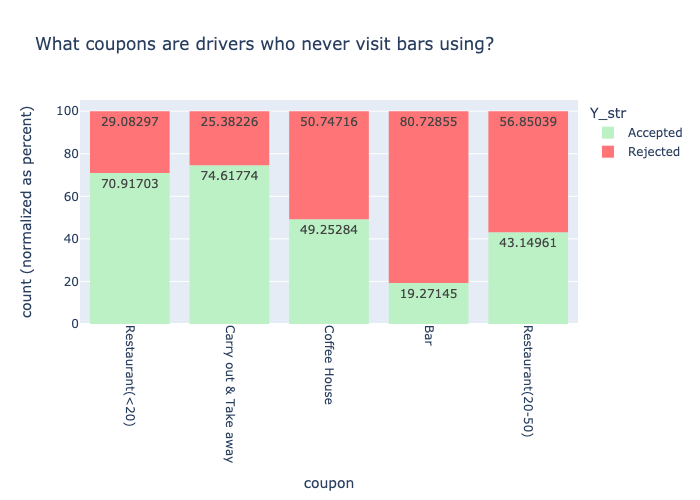

In [59]:
fig = px.histogram(data.query('Bar == "never"'),
                x="coupon",
                color="Y_str",
                color_discrete_map={'Rejected':'#FF7477','Accepted':'#BBF1C4'},
                title="What coupons are drivers who never visit bars using?",
                text_auto=True,
                barnorm="percent")
fig.update_xaxes(tickangle=90)

The majority of drivers who never visit bars are using coupons for "Carry out & Take away" and "Restaurant(<20)"

In [31]:
#Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.

#Create lists for the two groups
bar_three_or_fewer = ['never', 'less1', '1~3']
bar_more_than_three = ['4~8','gt8']

#Build dataframe subsets
bar_three_or_fewer_df = column_bar_df.query('Bar in @bar_three_or_fewer')
bar_more_than_three_df = column_bar_df.query('Bar in @bar_more_than_three')


#Calculate acceptance rate
acceptance_rate_bar_three_or_fewer = calculate_acceptance_ratio(bar_three_or_fewer_df)
acceptance_rate_bar_more_than_three = calculate_acceptance_ratio(bar_more_than_three_df)

#Print results
print_acceptance_ratio("Acceptance rate for folks with 3 or fewer bar visits a month",acceptance_rate_bar_three_or_fewer)
print_acceptance_ratio("Acceptance rate for folks with more than 3 bar visits a month",acceptance_rate_bar_more_than_three)

Acceptance Ratio for Acceptance rate for folks with 3 or fewer bar visits a month: 0.56
Acceptance Ratio for Acceptance rate for folks with more than 3 bar visits a month: 0.62


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


###### Because the question says "the all others", there is ambiguity: 
1. Do I print the acceptance ratio of that 1 concatenated subset of the data with 2^2 outcomes
2. Do I simply print out each of the acceptance ratios of the individual outcomes

In [32]:
#filter for drivers who go to a bar more than once
bar_more_than_once = ['1~3', '4~8','gt8']
bar_less_than_once = ['never', 'less1']
#filter for drivers over age 25
age_above_25 = ['26','31','36','41','46','50plus']
age_below_25 = ['below21','21']

#group1
bar_gt_once_age_above25_df = data.query('(Bar in @bar_more_than_once) and (age in @age_above_25)')
acceptance_rate_bar_gt_once_age_above25 = calculate_acceptance_ratio(bar_gt_once_age_above25_df)


#group 2
bar_gt_once_age_below25_df = data.query('(Bar in @bar_more_than_once) and (age in @age_below_25)')
acceptance_rate_bar_gt_once_age_below25 = calculate_acceptance_ratio(bar_gt_once_age_below25_df)


#group 3
bar_lt_once_age_above25_df = data.query('(Bar in @bar_less_than_once) and (age in @age_above_25)')
acceptance_rate_bar_lt_once_age_above25 = calculate_acceptance_ratio(bar_lt_once_age_above25_df)


#group 4
bar_lt_once_age_below25_df = data.query('(Bar in @bar_less_than_once) and (age in @age_below_25)')
acceptance_rate_bar_lt_once_age_below25 = calculate_acceptance_ratio(bar_lt_once_age_below25_df)

#all other groups scenario - concatenate dataframes
bar_all_others_df = pd.concat([bar_gt_once_age_below25_df, 
                               bar_lt_once_age_above25_df, 
                               bar_lt_once_age_below25_df], 
                               axis=0)

acceptance_rate_all_others = calculate_acceptance_ratio(bar_all_others_df)

#Print Results
print_acceptance_ratio("Go to a bar more than once a month and are over the age 25", acceptance_rate_bar_gt_once_age_above25)
print_acceptance_ratio("concatenated All Others subset",acceptance_rate_all_others)
print("\n\nAll Others comprises of:")
print_acceptance_ratio("Go to a bar less than once a month and are below the age 25",acceptance_rate_bar_lt_once_age_below25)
print_acceptance_ratio("Go to a bar less than once a month and are over the age 25", acceptance_rate_bar_lt_once_age_above25)
print_acceptance_ratio("Go to a bar more than once a month and are below the age 25", acceptance_rate_bar_gt_once_age_below25)


Acceptance Ratio for Go to a bar more than once a month and are over the age 25: 0.62
Acceptance Ratio for concatenated All Others subset: 0.55


All Others comprises of:
Acceptance Ratio for Go to a bar less than once a month and are below the age 25: 0.59
Acceptance Ratio for Go to a bar less than once a month and are over the age 25: 0.53
Acceptance Ratio for Go to a bar more than once a month and are below the age 25: 0.62


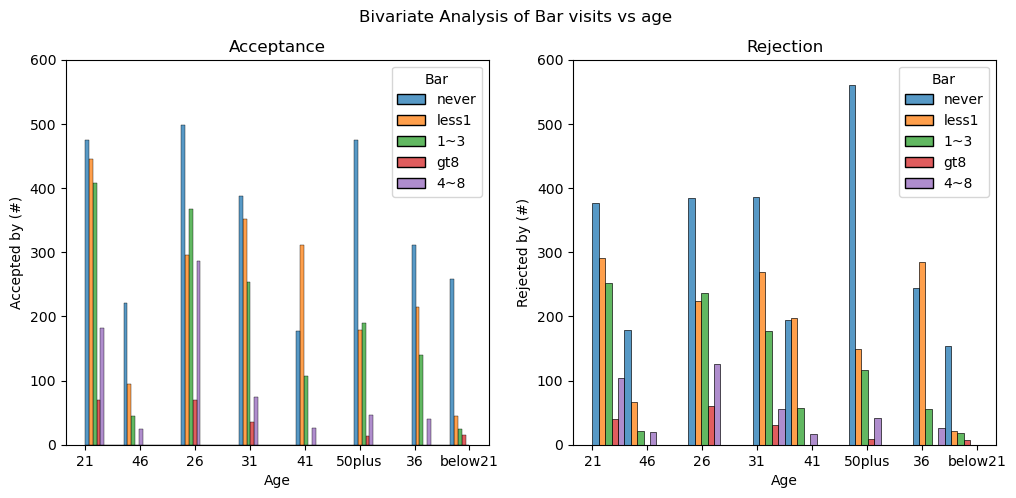

In [94]:
plt.figure(figsize=(12,5))
plt.suptitle("Bivariate Analysis of Bar visits vs age")
plt.subplot(121)
fig1 = sns.histplot(data.query('(Y_str=="Accepted")'),
             x="age", 
             hue="Bar",
             multiple='dodge',
             legend=True, binwidth=0.35, 
             discrete=False)
fig1.set(xlabel='Age', 
         ylabel='Accepted by (#)', 
         title="Acceptance")

plt.ylim(0, 600)

plt.subplot(122)
fig2 = sns.histplot(data.query('(Y_str=="Rejected")'),
             x="age", 
             hue="Bar",
             multiple='dodge',
             legend=True,
                    binwidth=0.6, 
             discrete=False)
fig2.set(xlabel='Age', 
         ylabel='Rejected by (#)', 
         title="Rejection")
plt.ylim(0, 600)
plt.show()

###### Based on the results, it is clear that the group who go to bars more than once a month have a higher acceptance rate than those who go less than once a month. For those who go to bars more than once a month age of the driver does not affect the results.  
The age factors in for folks who go less than once a month. The acceptance rate for those who go less than once a month and are 21 is highest. 

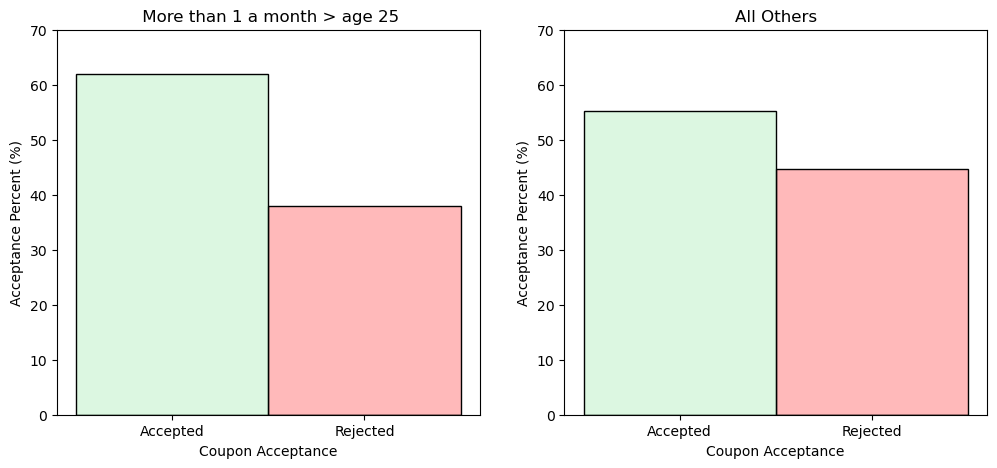

In [33]:
plt.figure(figsize=(12,5))
plt.subplot(121)
sns.histplot(bar_gt_once_age_above25_df.sort_values(by="Y_str"), 
             x="Y_str", 
             hue="Y_str",
             stat='percent',
             palette={'Rejected':'#FF7477','Accepted':'#BBF1C4'},
             legend=False).set(xlabel='Coupon Acceptance', 
         ylabel='Acceptance Percent (%)', 
         title=" More than 1 a month > age 25")
plt.ylim(0, 70)

plt.subplot(122)
fig2 = sns.histplot(bar_all_others_df.sort_values(by="Y_str"), 
             x="Y_str", 
             hue="Y_str",
             palette={'Rejected':'#FF7477','Accepted':'#BBF1C4'}, 
             stat='percent',
             legend=False).set(xlabel='Coupon Acceptance', 
        ylabel='Acceptance Percent (%)', 
        title='All Others')
plt.ylim(0, 70)
#plt.savefig('images/morethan1monthage25.jpg')
plt.show()

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [34]:
def create_custom_grouping(bar,passenger,occupation):
    if(
        (bar in ['1~3', '4~8','gt8']) & 
        (passenger != 'Kid(s)') & 
        ('occupation' != 'Farming Fishing & Forestry')):
        return 'custom_group'
    else:
        return 'other'

#create a custom grouping
data['bar_passenger_occupation'] = data.apply(lambda row: create_custom_grouping(row['Bar'],row['passenger'],row['occupation']),axis=1) 

#print the acceptance ratio of each group
print(cross_tab_acceptance_ratio(data,'bar_passenger_occupation'))



Y_str                     Accepted  Rejected  Acceptance_Ratio
bar_passenger_occupation                                      
custom_group                  2293      1392          0.622252
other                         4864      4061          0.544986


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [35]:
#Case 1: go to bars more than once a month, had passengers that were not a kid, and were not widowed 
bar_gt_1_not_kid_not_widow_df = data.query('(Bar in @bar_more_than_once) \
                                            and (passenger != "Kid(s)") \
                                            and (maritalStatus != "Widowed")')

acceptance_bar_gt_1_not_kid_not_widow = calculate_acceptance_ratio(bar_gt_1_not_kid_not_widow_df)
print_acceptance_ratio("drivers who go to bars more than once a month, no kid passenger, and not widowed"
                       ,acceptance_bar_gt_1_not_kid_not_widow)

#Case 2: go to bars more than once a month and are under the age of 30
age_under_30 = ['below21', '21','26']
bar_gt_1_under_30_df = data.query('(Bar in @bar_more_than_once) and (age in @age_under_30)')
acceptance_bar_gt_1_under_30 = calculate_acceptance_ratio(bar_gt_1_under_30_df)
print_acceptance_ratio("drivers who go to bars more than once a month with age < 30",acceptance_bar_gt_1_under_30)

#Case 3: go to cheap restaurants more than 4 times a month and income is less than 50K
restaurantLessThan20_more_than_4 = ['4~8', 'gt8']
income_less_50k = ['Less than $12500','$12500 - $24999','$25000 - $37499','$37500 - $49999']
rest_gt_4_income_lt_50k_df = data.query('(RestaurantLessThan20 in @restaurantLessThan20_more_than_4) and (income in @income_less_50k)')
acceptance_rest_gt_4_income_lt_50k = calculate_acceptance_ratio(rest_gt_4_income_lt_50k_df)
print_acceptance_ratio("drivers who go to cheap restaurants more than 4 times a month with income <50K", acceptance_rest_gt_4_income_lt_50k)                                      

Acceptance Ratio for drivers who go to bars more than once a month, no kid passenger, and not widowed: 0.62
Acceptance Ratio for drivers who go to bars more than once a month with age < 30: 0.63
Acceptance Ratio for drivers who go to cheap restaurants more than 4 times a month with income <50K: 0.6


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

---
- The acceptance rate is higher for drivers who are over the age of 25 and go to the bar more than once. 
- The acceptance rate is higher for driver who go to cheap restaurants 4 or more times a month
- The acceptance rate is higher when the there are no Kids as passengers
- The acceptance rate is higher for drivers who are below 30.
- Acceptance rate for drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry: 0.62 All others: 0.54
- Drivers over the age of 50 who don't go to the bar, have the higher coupon rejection rate. 
- Based on the results, it is clear that the group who go to bars more than once a month have a higher acceptance rate than those who go less than once a month. For those who go to bars more than once a month age of the driver does not affect the results.
- The age factors in for folks who go less than once a month. The acceptance rate for those who go less than once a month and are 21 is highest.
---

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

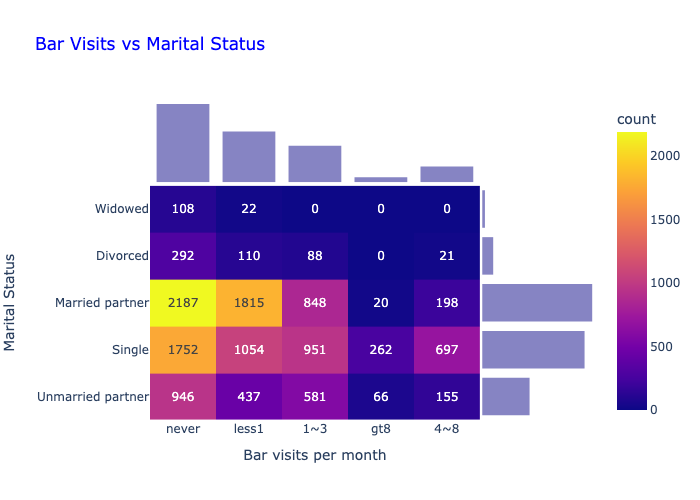

In [36]:
fig = px.density_heatmap(data, 
                x='Bar',
                y='maritalStatus',
                title="Bar Visits vs Marital Status", marginal_x="histogram", marginal_y="histogram",
                text_auto=True)
fig.update_layout(showlegend = True,
                  plot_bgcolor='white',
                  title_font_color="blue",
                  yaxis_title = "Marital Status",
                  xaxis_title = "Bar visits per month")


Married people do not frequent bars as much as Single people. Their distribution falls mostly in the never or less1 category of bar visits per month. The data is skewed towards married and single people in comparison to folks who are divorced and widowed. So it is not a reliable predictor of customer behavior for the Divorced and Widowed categories.

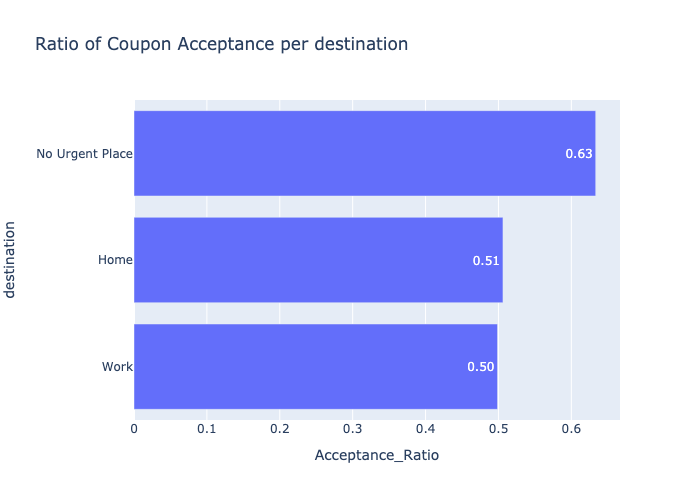

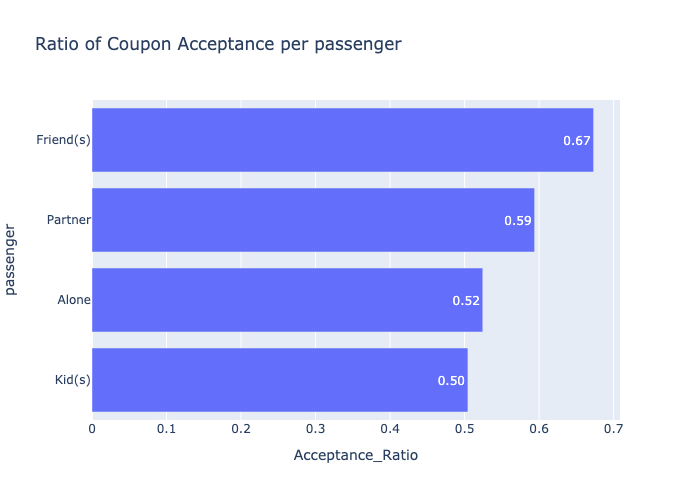

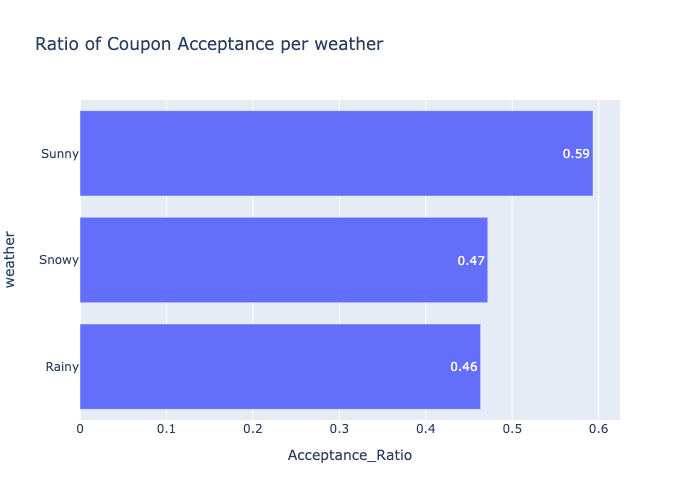

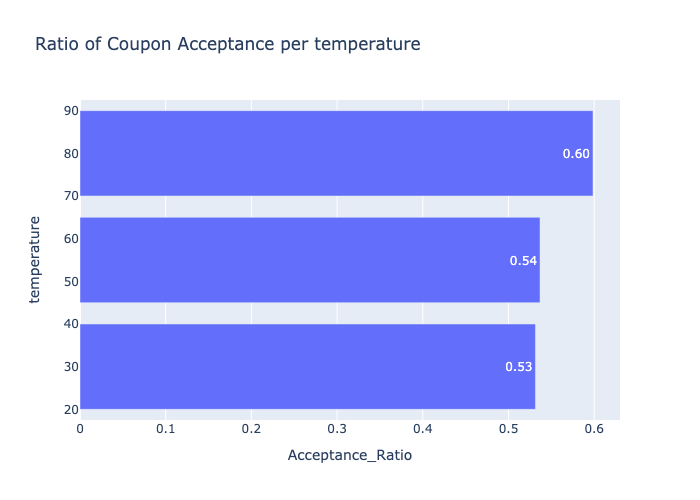

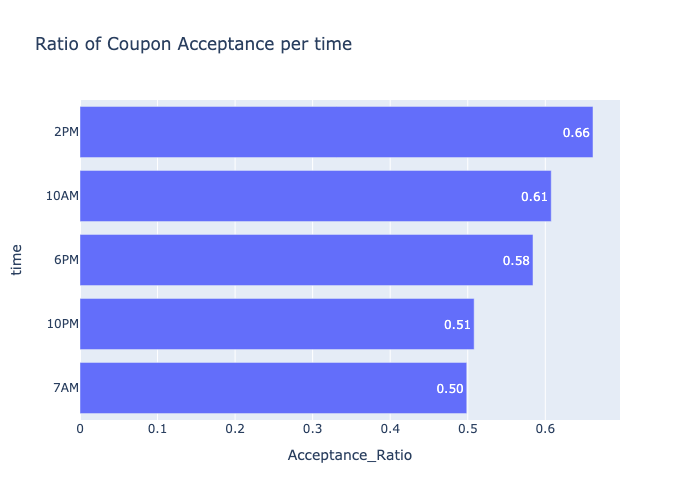

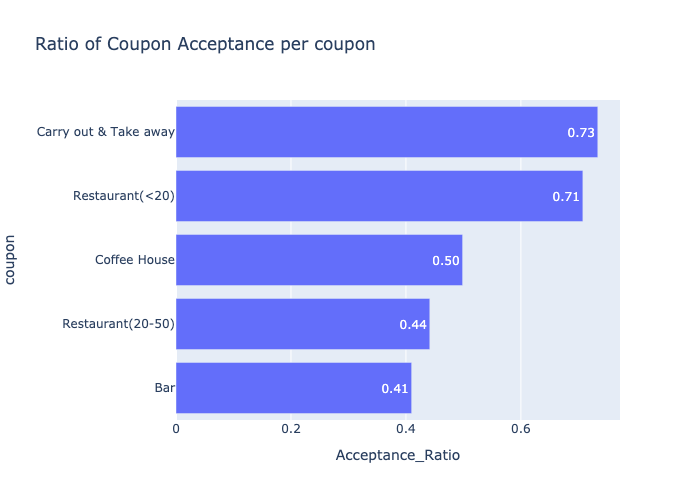

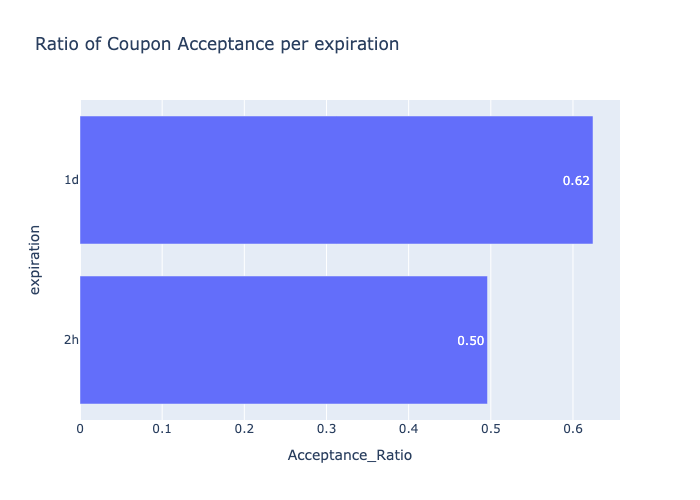

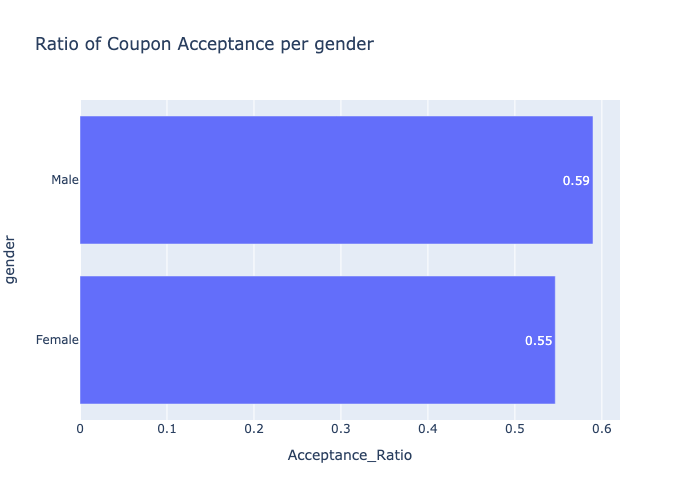

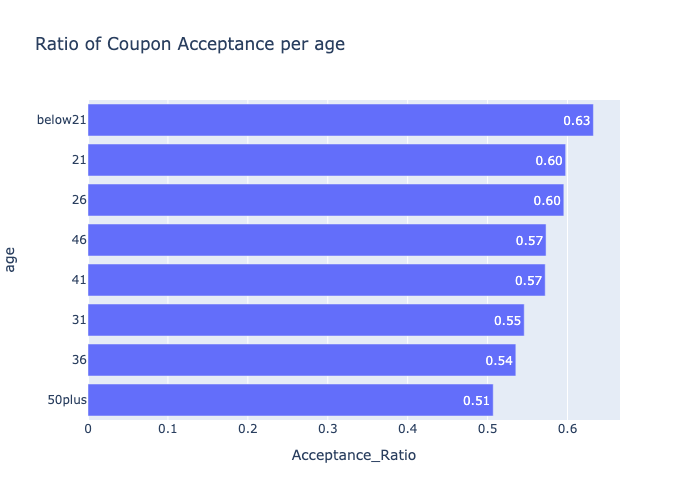

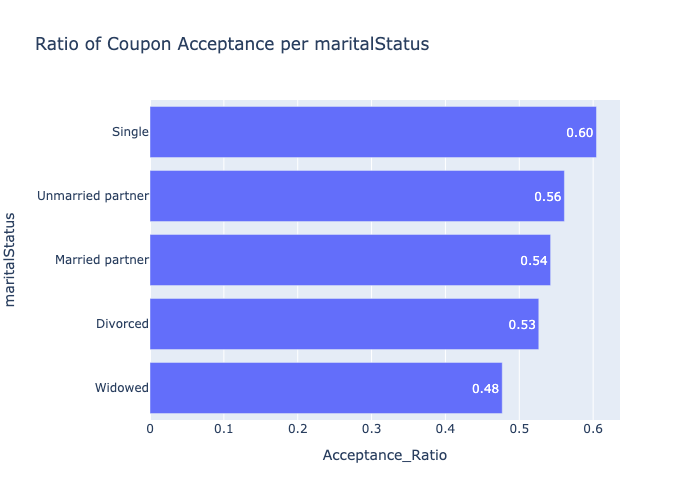

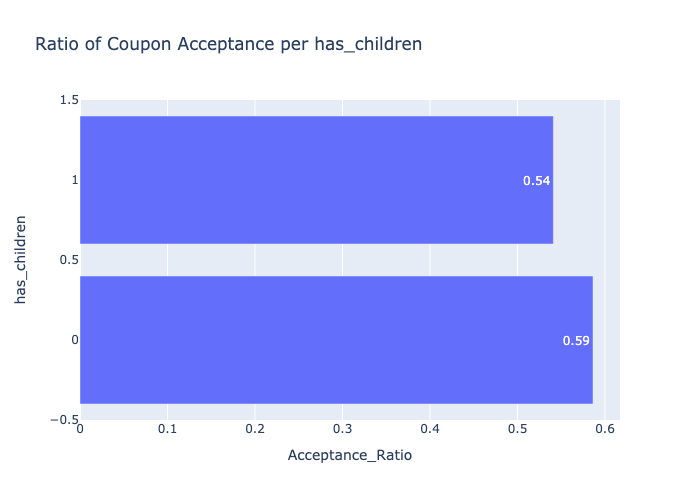

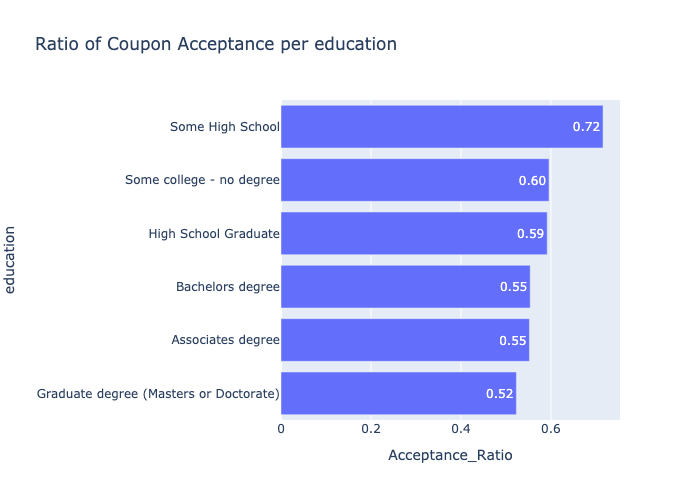

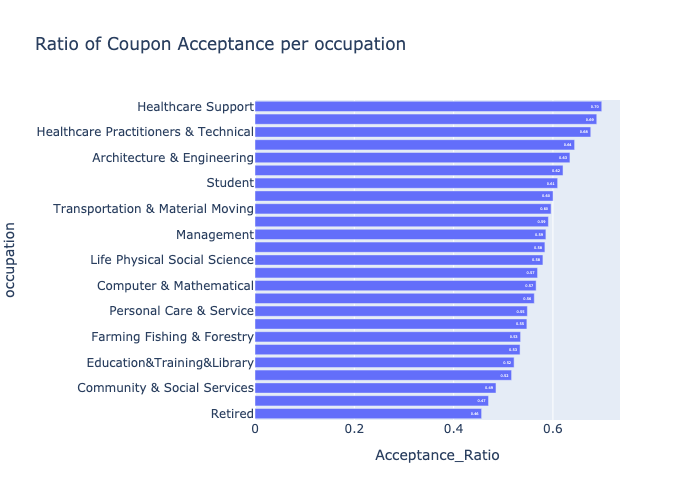

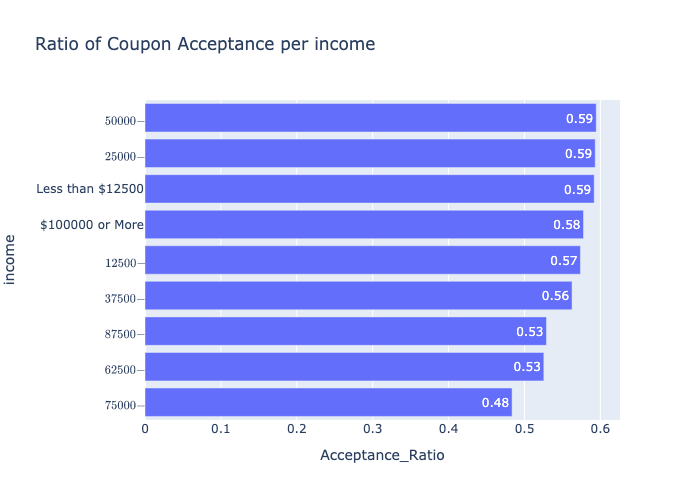

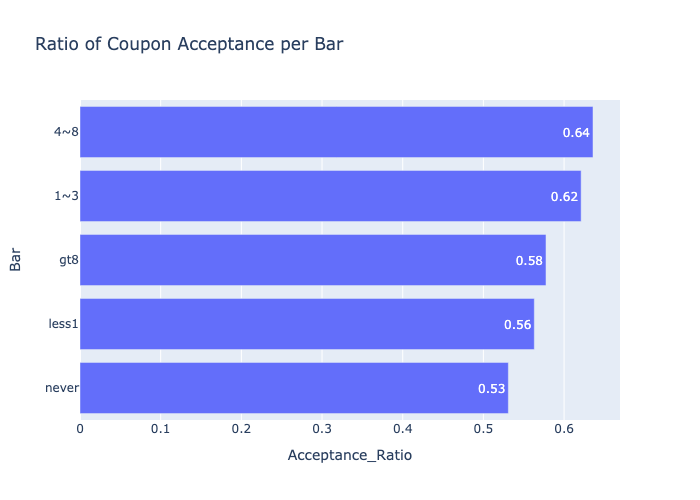

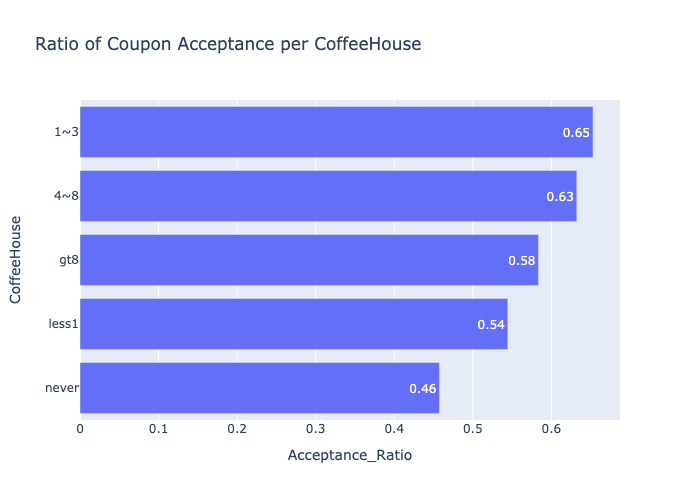

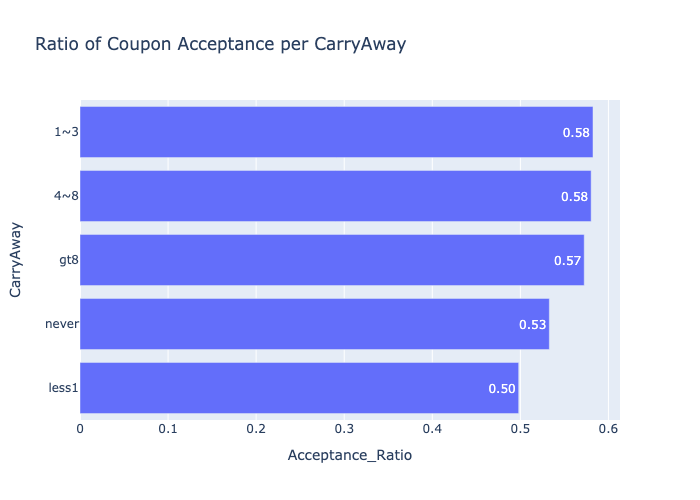

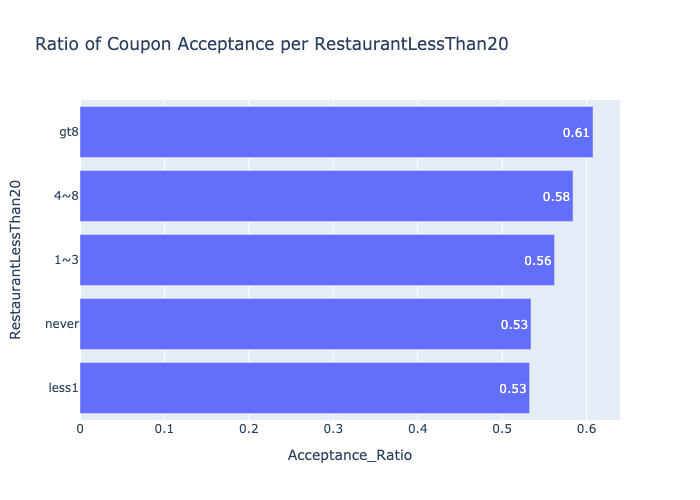

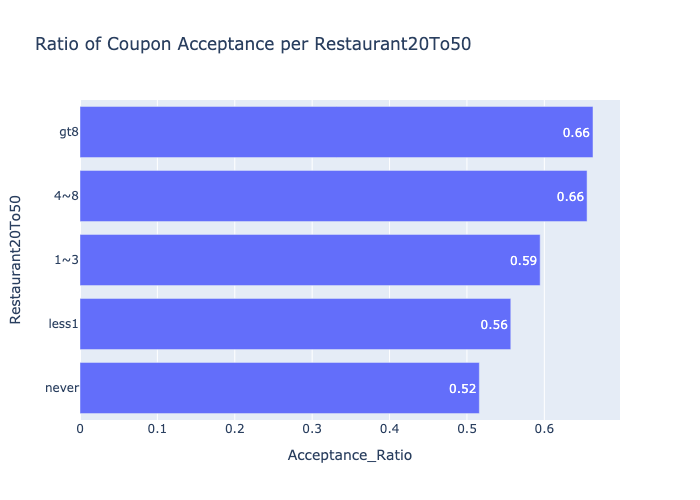

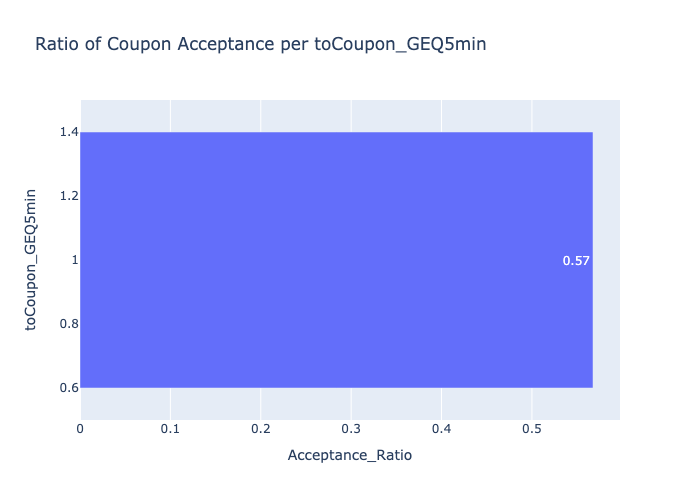

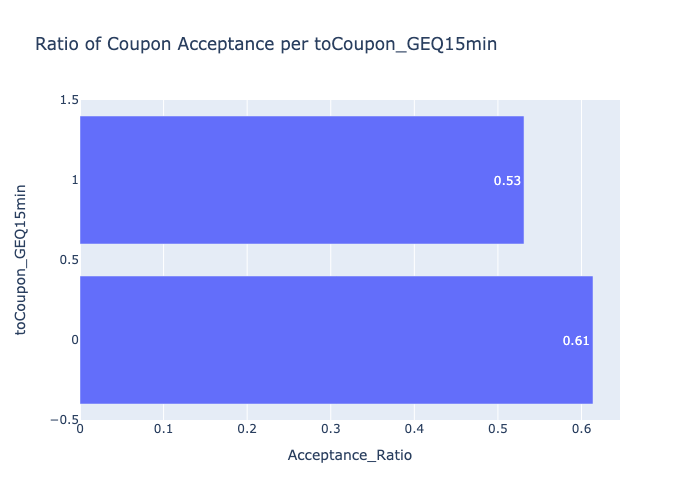

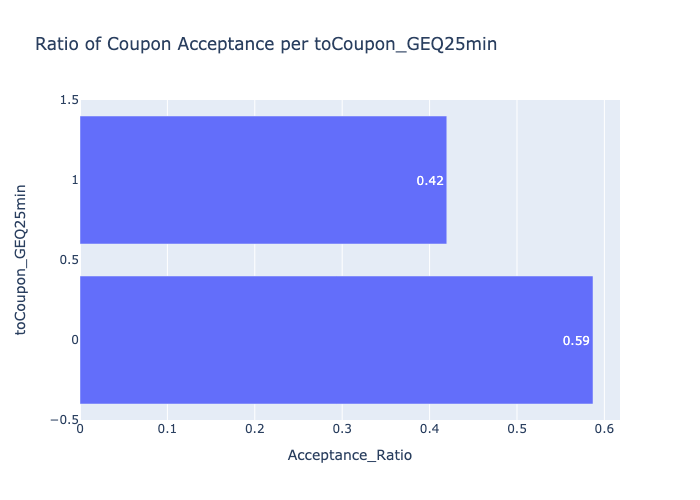

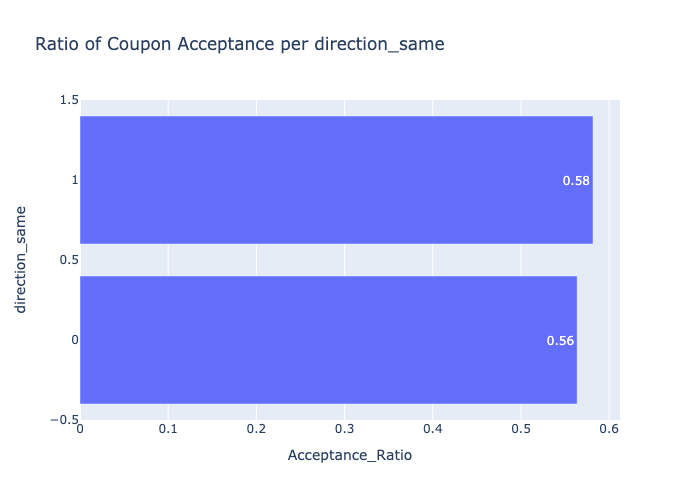

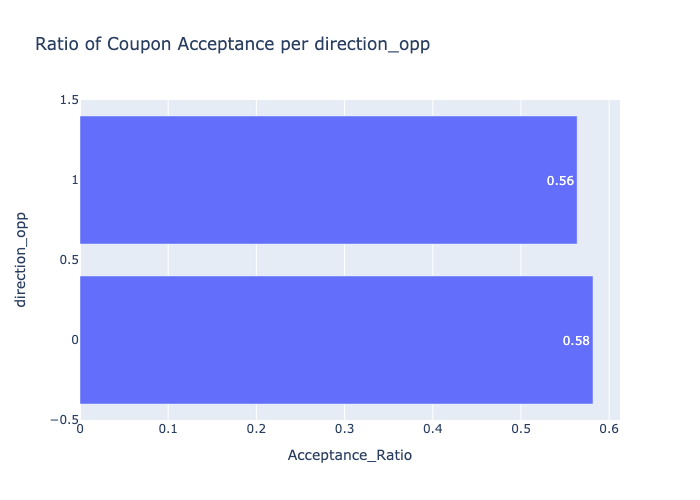

In [37]:
#cross tabulation of coupon acceptance by category
for col in data.columns:
    if(col not in ['Y','Y_str','temperature_str','bar_passenger_occupation']):
        cross_df = cross_tab_acceptance_ratio(data,col)
        fig_ratio = px.bar(cross_df.sort_values(by='Acceptance_Ratio'),
                           x='Acceptance_Ratio',
                           text_auto=True,
                           title=f'Ratio of Coupon Acceptance per {col}')
        fig_ratio.update_traces(texttemplate='%{x:.2f}')
        #fig_ratio.write_image('images/'+col+".jpg")
        fig_ratio.show()

### Coupon Acceptance by type of Coupon

###### 1. Create a dataframe for coupon

In [38]:
coupon_df = data[['coupon','Y_str']]

###### 2. Calculate coupon acceptance ratio for all the coupon types

In [39]:
coupon_cross_df = cross_tab_acceptance_ratio(coupon_df,'coupon')

print(coupon_cross_df.sort_values(by='Acceptance_Ratio', ascending=False))

Y_str                  Accepted  Rejected  Acceptance_Ratio
coupon                                                     
Carry out & Take away      1720       624          0.733788
Restaurant(<20)            1967       812          0.707809
Coffee House               1989      2000          0.498621
Restaurant(20-50)           657       831          0.441532
Bar                         824      1186          0.409950


###### Carry out & Take Away have the highest acceptance ratio at 73%, followed by Restaurant(<20) at 71%

###### 3. Univariate analysis of the acceptance rate between by time.

In [40]:
time_cross_df = cross_tab_acceptance_ratio(data,'time')

print(time_cross_df.sort_values(by='Acceptance_Ratio', ascending=False))

Y_str  Accepted  Rejected  Acceptance_Ratio
time                                       
2PM        1327       679          0.661515
10AM       1380       891          0.607662
6PM        1881      1339          0.584161
10PM       1016       983          0.508254
7AM        1553      1561          0.498715


##### 4. Bivariate analysis of acceptance rate by coupon and time

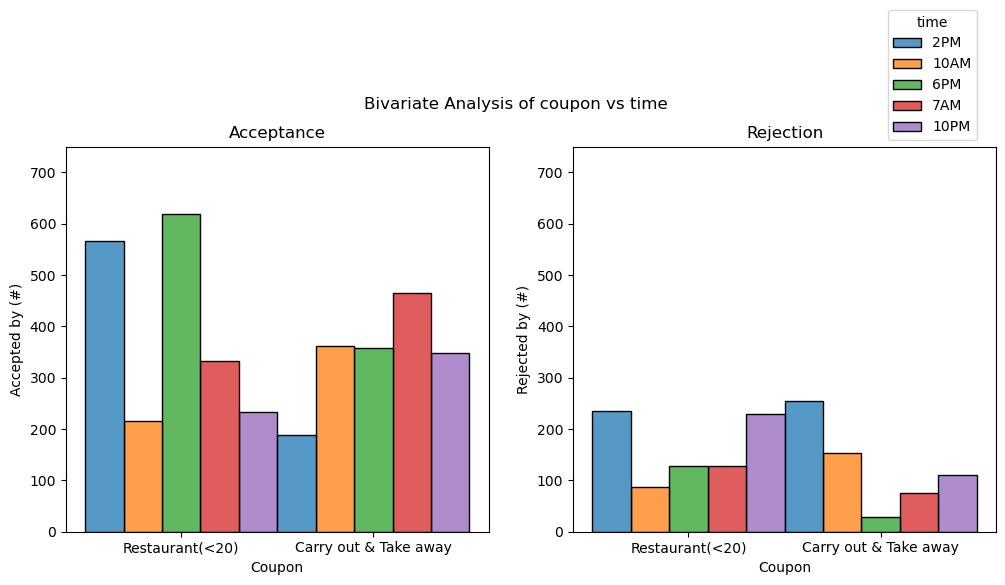

In [90]:
carryout_restaurant_20 = ['Carry out & Take away','Restaurant(<20)']

plt.figure(figsize=(12,5))
plt.suptitle("Bivariate Analysis of coupon vs time")
plt.subplot(121)
fig1 = sns.histplot(data.query('(coupon in @carryout_restaurant_20) and (Y_str=="Accepted")'),
             x="coupon", 
             hue="time",
             multiple='dodge',
             legend=True)
fig1.set(xlabel='Coupon', 
         ylabel='Accepted by (#)', 
         title="Acceptance")
sns.move_legend(fig1, loc="lower center",bbox_to_anchor=(2.05, 1))
plt.ylim(0, 750)

plt.subplot(122)
fig2 = sns.histplot(data.query('(coupon in @carryout_restaurant_20) and (Y_str=="Rejected")'),
             x="coupon", 
             hue="time",
             multiple='dodge',
             legend=False)
fig2.set(xlabel='Coupon', 
         ylabel='Rejected by (#)', 
         title="Rejection")
plt.ylim(0, 750)
plt.show()

Business transactions for "Restaurant<20", peaks at 2PM and 6PM, while transactions are relatively stable for "Carry out & Take Away", with a slight peak at 7AM. 
We know the coupon acceptance rate is lowest at 7AM, and its a low volume transactions time for "Restaurant<20". So let us not use 7AM in the custom grouping.

###### 5. Compare the acceptance ratio for drivers who accepted a coupon for "Carry out & Take away" or "Restaurant<20" at 10 am, 2pm, and 6pm vs all others coupon, time combination


In [42]:
def create_custom_grouping(coupon,time):
    if((coupon in ['Carry out & Take away','Restaurant(<20)']) & (time in ['2PM','10AM','6PM'])):
        return 'custom_group'
    else:
        return 'other'

#create a custom grouping
data['coupon_time'] = data.apply(lambda row: create_custom_grouping(row['coupon'],row['time']),axis=1) 

#print the acceptance ratio of each group
print(cross_tab_acceptance_ratio(data,'coupon_time'))

Y_str         Accepted  Rejected  Acceptance_Ratio
coupon_time                                       
custom_group      2308       605          0.792310
other             4849      4848          0.500052


- 'Carry out & Take away' 'Restaurant(<20) with coupon received at 10AM or 2PM or 6PM: 0.79
- Not ('Carry out & Take away' or 'Restaurant(<20') with coupon received at 10AM or 2PM or 6PM): 0.50

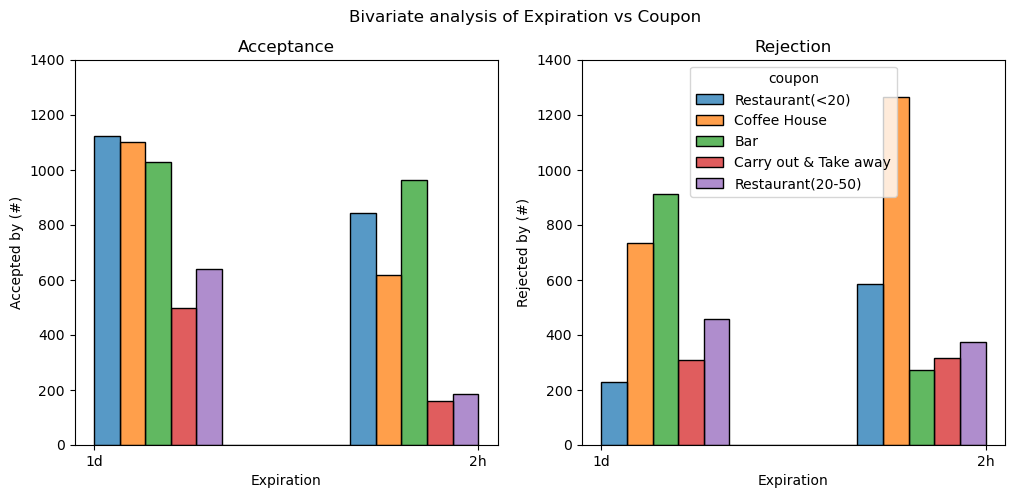

In [43]:
plt.figure(figsize=(12,5))
plt.suptitle("Bivariate analysis of Expiration vs Coupon")
plt.subplot(121)
fig1 = sns.histplot(data.query('Y_str=="Accepted"').sort_values(by='expiration'),
             x="expiration", 
             hue="coupon",
             multiple='dodge',
             legend=False,
             binwidth=0.35, 
             discrete=False)
fig1.set(xlabel='Expiration', 
         ylabel='Accepted by (#)', 
         title="Acceptance")

plt.ylim(0, 1400)

plt.subplot(122)
fig2 = sns.histplot(data.query('Y_str=="Rejected"').sort_values(by='expiration'),
             x="expiration", 
             hue="coupon",
             multiple='dodge',
             legend=True,
             binwidth=0.35, 
             discrete=False)
fig2.set(xlabel='Expiration', 
         ylabel='Rejected by (#)', 
         title="Rejection")
sns.move_legend(fig2, loc="upper center")
plt.ylim(0, 1400)
plt.show()

Drivers prefer coupons with 1d expiration; “Restaurant(<20)” has the lowest rejection for 1d expirations. Coupons for "Coffee House" are okay with 2-hour expiration coupons. Coupons for “Restaurant(<20)” have a high rejection rate for 2h expiration. Factoring the expiration period in, improves the acceptance ratio.

In [44]:
def create_custom_grouping(coupon,time,expiration):
    if((coupon in ['Carry out & Take away','Restaurant(<20)']) 
       & (time in ['2PM','10AM','6PM'])
       & (expiration != '2h')):
        return 'custom_group'
    else:
        return 'other'

#create a custom grouping
data['coupon_time_expiration'] = data.apply(lambda row: create_custom_grouping(row['coupon'],row['time'],row['expiration']),axis=1) 

#print the acceptance ratio of each group
print(cross_tab_acceptance_ratio(data,'coupon_time_expiration'))

Y_str                   Accepted  Rejected  Acceptance_Ratio
coupon_time_expiration                                      
custom_group                1230       196          0.862553
other                       5927      5257          0.529954


##### 5. Compare the acceptance ratio for drivers who accepted a coupon for "Carry out & Take away" or "Restaurant<20" and education level is "Some High School"

In [45]:
def create_custom_grouping(coupon,education):
    if((coupon in ['Carry out & Take away','Restaurant(<20)']) & (education == "Some High School")):
        return 'custom_group'
    else:
        return 'other'

#create a custom grouping
data['coupon_education'] = data.apply(lambda row: create_custom_grouping(row['coupon'],row['education']),axis=1) 

#print the acceptance ratio of each group
print(cross_tab_acceptance_ratio(data,'coupon_education'))

Y_str             Accepted  Rejected  Acceptance_Ratio
coupon_education                                      
custom_group            28         6          0.823529
other                 7129      5447          0.566873


- Carry out & Take away drivers with some high school education: 82%
- Not (Carry out & Take away drivers with education some High School): 57%

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'Some college - no degree'),
  Text(1, 0, 'Bachelors degree'),
  Text(2, 0, 'Associates degree'),
  Text(3, 0, 'High School Graduate'),
  Text(4, 0, 'Graduate degree (Masters or Doctorate)'),
  Text(5, 0, 'Some High School')])

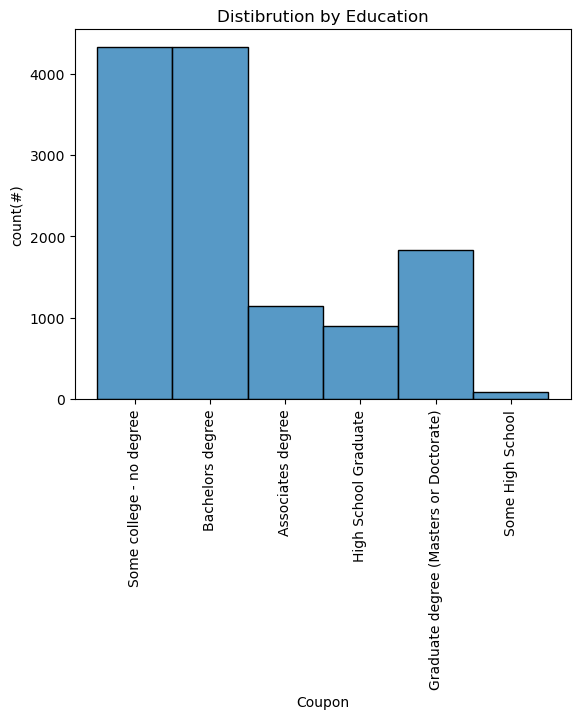

In [46]:
sns.histplot(data,x="education").set(xlabel='Coupon', ylabel='count(#)', title="Distibrution by Education", )
plt.xticks(rotation=90)

The highest acceptance percent is associated with an education category "Some High School". Based on the histplots , it is apparent that the survey does not have sufficient sample data for that category. So, it could be coincidence that this education category has a high acceptance ratio. Or it would be good to conduct a survey focused specifically on that group, to confirm that the acceptance ratio is indeed valid.

###### 6. Bivariate analysis of CarryAway vs toCoupon_GEQ25min

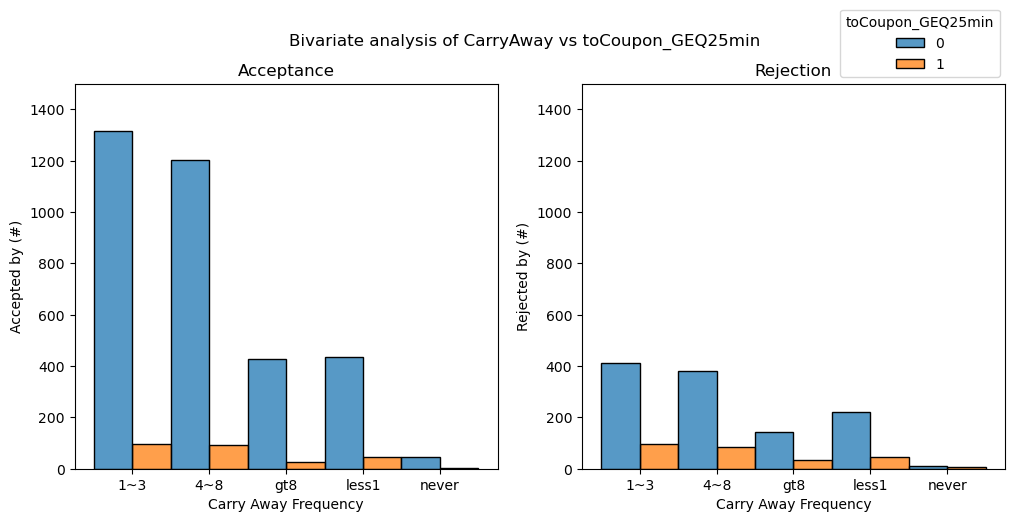

In [47]:
carryout_restaurant_20 = ['Carry out & Take away','Restaurant(<20)']

plt.figure(figsize=(12,5))
plt.suptitle("Bivariate analysis of CarryAway vs toCoupon_GEQ25min")
plt.subplot(121)
fig1 = sns.histplot(data.query('(coupon in @carryout_restaurant_20) and (Y_str=="Accepted")'),
             x="CarryAway", 
             hue="toCoupon_GEQ25min",
             multiple='dodge',
             legend=True)
fig1.set(xlabel='Carry Away Frequency', 
         ylabel='Accepted by (#)', 
         title="Acceptance")
sns.move_legend(fig1, loc="lower center",bbox_to_anchor=(2, 1))
plt.ylim(0, 1500)

plt.subplot(122)
fig2 = sns.histplot(data.query('(coupon in @carryout_restaurant_20) and (Y_str=="Rejected")'),
             x="CarryAway", 
             hue="toCoupon_GEQ25min",
             multiple='dodge',
             legend=False)
fig2.set(xlabel='Carry Away Frequency', 
         ylabel='Rejected by (#)', 
         title="Rejection")
plt.ylim(0, 1500)
plt.show()


#####  7. Compare the acceptance rate for drivers who accepted a coupon for "Carry out & Take away" or "Restaurant<20", who carried away 1~8 times within a driving distance to the restaurant/bar for using the coupon less than 25 minutes.

In [48]:
carried_away_mt_once_lt_8 = ['1~3', '4~8']

def create_custom_grouping(coupon, CarryAway, toCoupon_GEQ25min ):
    if((coupon in ['Carry out & Take away','Restaurant(<20)']) 
       & (CarryAway in carried_away_mt_once_lt_8)
       & (toCoupon_GEQ25min == 0)):
        return 'custom_group'
    else:
        return 'other'

#create a custom grouping
data['coupon_carryaway_GEQ25min'] = data.apply(lambda row: create_custom_grouping(row['coupon'],row['CarryAway'],row['toCoupon_GEQ25min']),axis=1) 

#print the acceptance ratio of each group
print(cross_tab_acceptance_ratio(data,'coupon_carryaway_GEQ25min'))

Y_str                      Accepted  Rejected  Acceptance_Ratio
coupon_carryaway_GEQ25min                                      
custom_group                   2519       792          0.760797
other                          4638      4661          0.498763


- Coupon - ("Carry out & Take away" or "Resturant(<20)" drivers who carried away between 1~8 times with a coupon for < 25minutes away : 76%
- Others: 50%

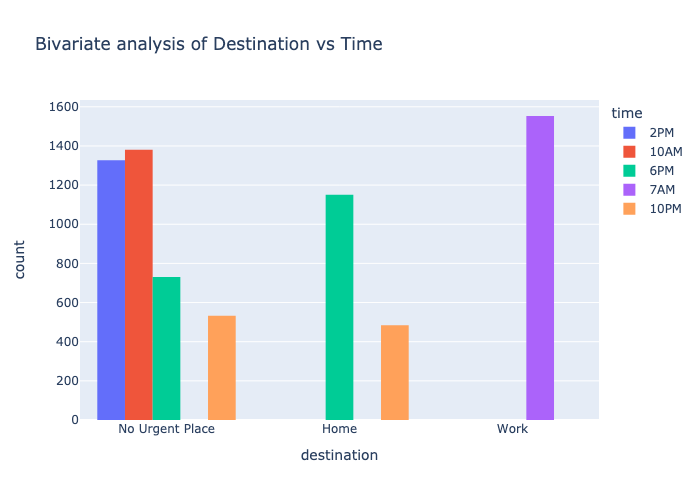

In [71]:
px.histogram(data.query('Y_str=="Accepted"'),
             x="destination", 
             color="time", 
             barmode="group", 
             title="Bivariate analysis of Destination vs Time")

At 7am all drivers are headed to work. If a driver is out and about at 2PM and 10AM, then are headed to a "No Urgent Place". At 6PM most people head home and few go to a "No Urgent Place"

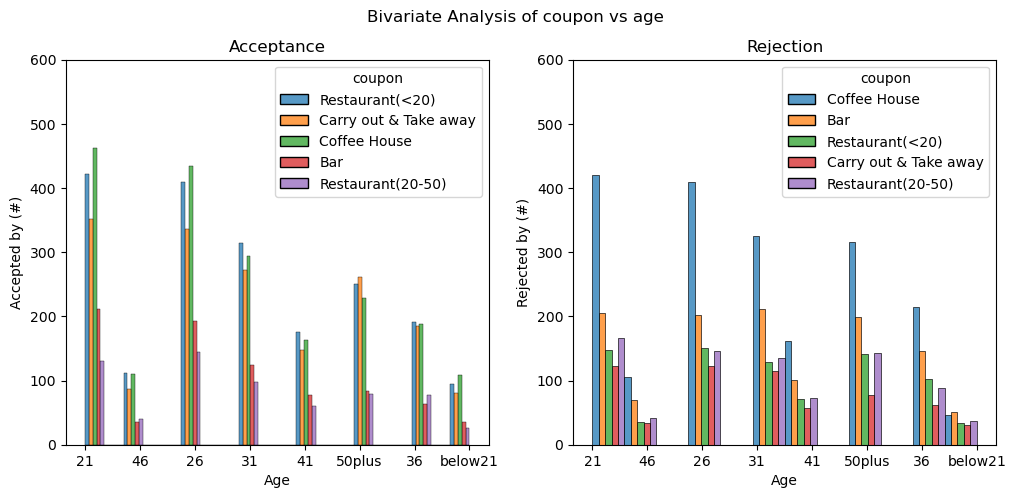

In [92]:
plt.figure(figsize=(12,5))
plt.suptitle("Bivariate Analysis of coupon vs age")
plt.subplot(121)
fig1 = sns.histplot(data.query('(Y_str=="Accepted")'),
             x="age", 
             hue="coupon",
             multiple='dodge',
             legend=True, binwidth=0.35, 
             discrete=False)
fig1.set(xlabel='Age', 
         ylabel='Accepted by (#)', 
         title="Acceptance")

plt.ylim(0, 600)

plt.subplot(122)
fig2 = sns.histplot(data.query('(Y_str=="Rejected")'),
             x="age", 
             hue="coupon",
             multiple='dodge',
             legend=True,
                    binwidth=0.6, 
             discrete=False)
fig2.set(xlabel='Age', 
         ylabel='Rejected by (#)', 
         title="Rejection")
plt.ylim(0, 600)
plt.show()



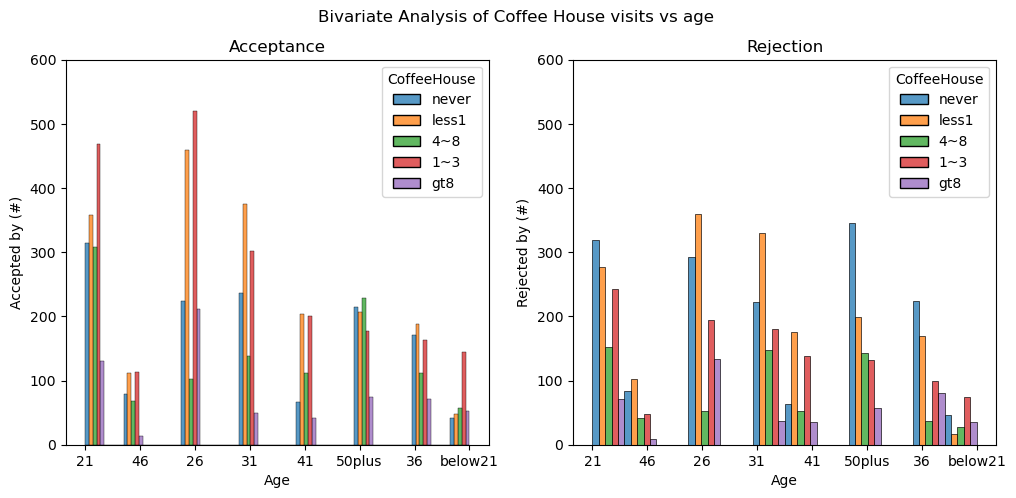

In [84]:
plt.figure(figsize=(12,5))
plt.suptitle("Bivariate Analysis of Coffee House visits vs age")
plt.subplot(121)
fig1 = sns.histplot(data.query('(Y_str=="Accepted")'),
             x="age", 
             hue="CoffeeHouse",
             multiple='dodge',
             legend=True, binwidth=0.35, 
             discrete=False)
fig1.set(xlabel='Age', 
         ylabel='Accepted by (#)', 
         title="Acceptance")

plt.ylim(0, 600)

plt.subplot(122)
fig2 = sns.histplot(data.query('(Y_str=="Rejected")'),
             x="age", 
             hue="CoffeeHouse",
             multiple='dodge',
             legend=True,
                    binwidth=0.6, 
             discrete=False)
fig2.set(xlabel='Age', 
         ylabel='Rejected by (#)', 
         title="Rejection")
plt.ylim(0, 600)
plt.show()

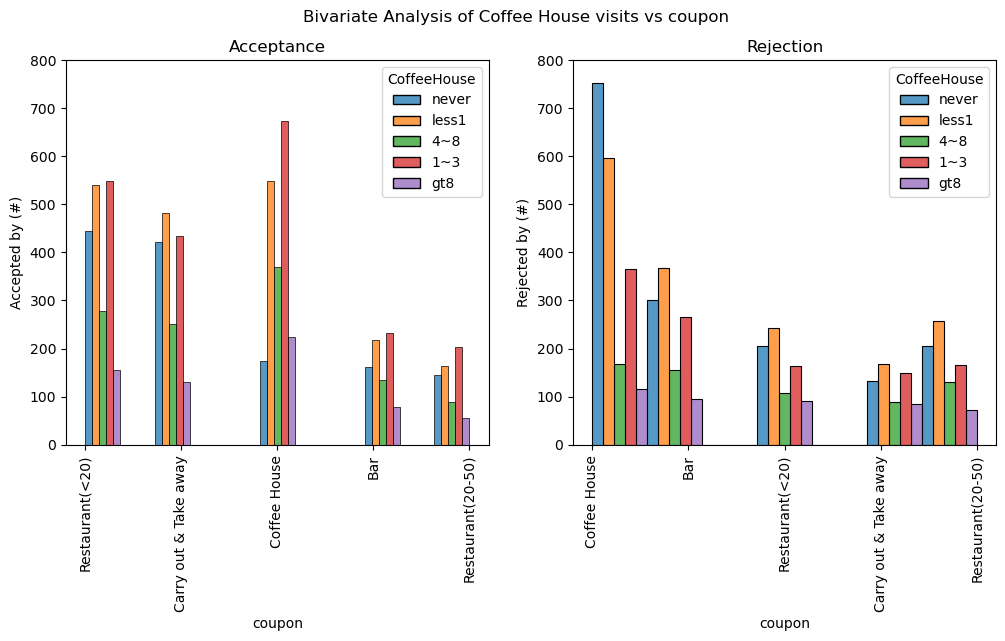

In [100]:
plt.figure(figsize=(12,5))
plt.suptitle("Bivariate Analysis of Coffee House visits vs coupon")
plt.subplot(121)
fig1 = sns.histplot(data.query('(Y_str=="Accepted")'),
             x="coupon", 
             hue="CoffeeHouse",
             multiple='dodge',
             legend=True, binwidth=0.35, 
             discrete=False)
fig1.set(xlabel='coupon', 
         ylabel='Accepted by (#)', 
         title="Acceptance")

plt.ylim(0, 800)
plt.xticks(rotation=90)

plt.subplot(122)
fig2 = sns.histplot(data.query('(Y_str=="Rejected")'),
             x="coupon", 
             hue="CoffeeHouse",
             multiple='dodge',
             legend=True,
                    binwidth=0.6, 
             discrete=False)
fig2.set(xlabel='coupon', 
         ylabel='Rejected by (#)', 
         title="Rejection")
plt.ylim(0, 800)
plt.xticks(rotation=90)
plt.show()


People age 21 and 26, who visit the coffee houses 1 to 3 times a month have a higher coupon acceptance rate for coffee

##### Summary of Findings
To summarize, summer is the best time to run a marketing campaign when the temperature is 80 degrees. The most lucrative coupons are those for Carry out & Take away or for cheap restaurants for meals under $20. The best time of day to send these coupons is 10 AM, 2 PM, and 6 PM to people who carry away between 1 to 8 times a month. High outcomes are also associated with drivers who have no Urgent Work and have no Kid(s) riding with them. The restaurants are preferred to be between 15 and 25 minutes away. Ideally, the coupon should have at least a 1-day expiration time. The only exception is for Coffee Houses, where a 2-hour expiration time is acceptable. Bar coupons do not do well. If you do market Bar coupons, its best to send to those drivers who visit 1 to 8 times a month. Avoid sending Bar coupons those aged 50 and over. To promote Coffee House coupons, its best to do so to customers age 21 and 26 who visit 1 to 3 times a month. We need to gather more data for education group Some High School. They have high potential for accepting coupons for carry out and cheap restaurants. We should also gather data for Marital Status of Widowed or Divorced as there is insufficient data for accurate analysis.
Gender is not a good feature for determining high acceptance as the acceptance ratio is close for both possible outcomes. Direction same is not a good feature.

Next steps: We should categorize the occupation into smaller buckets as there are too many categories for sparse data. Discard gender, direction same as they have similar acceptance rejection ratio for their categories.